# <u>Data Analysis

In [1]:
#pip install textblob

In [57]:
#pip install alpha_vantage

In [3]:
#pip install wordcloud

In [171]:
# Importing modules needed
import pandas as pd
from matplotlib import pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS
import datetime
from textblob import TextBlob
import string
from textblob.sentiments import NaiveBayesAnalyzer
import seaborn as sns
import statsmodels.api as sm

# Introduction

##### We conducted the following types of analysis:
<ul>
    <li>Word Clouds: From the word frequency CSVs, we use the wordcloud module to generate a wordcloud of the most mentioned words in Guardian articles, for each quarter of 2021
    <li>Guardian - Occurrence Analysis: From the Guardian covid articles CSV, we find the number of articles published containing covid and vaccine related words, and calculate the average number of times these words were mentioned each day, each month of the year
    <li>Sentiment Analysis:
        <ol>
            <li>2021: Using the NYT 2021 articles CSV, we determine the sentiment of each article abstract, to determine the polarity - ie whether the article has a positive sentiment (indicated by a positive polarity, max 1) or a negative sentiment (indicated by a negative polarity, max -1) - and the subjectivity (where 0 is completely objective, and 1 is completely subjective)
            <li>November only: Using the NYT November articles CSV, we determine the sentiment of each article abstract and headline

# Word Clouds

#### Using the wordcloud package to generate word clouds, one for each quarter

Q1 Guardian word cloud


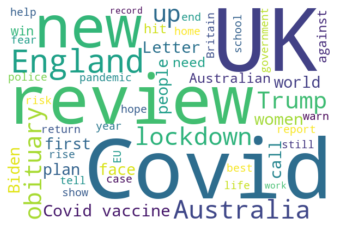

Q2 Guardian word cloud


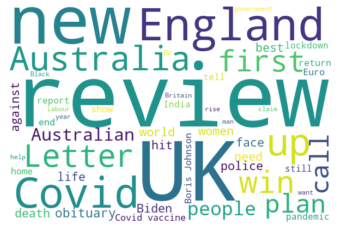

Q3 Guardian word cloud


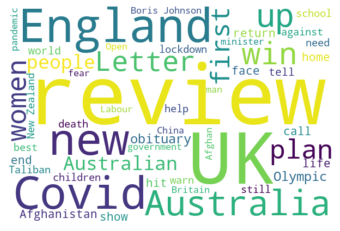

Q4 Guardian word cloud


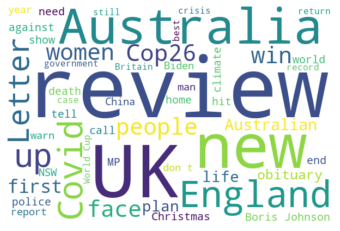

In [139]:
file = 1
for file in range (1,5):
    text = open(f'data/Guardian_articles_Q{file}.csv', mode='r', encoding='utf-8').read()
    stop_words = ['s','crossword','amid','way','over','could','day','years','into','may','must','right','been','go','week','time','make','back','happened','so','do','our','about','but','if','now','should','off','our','cant','got','have','dont','than','more','get','an','does','just','say','take','met','had','be','im','like','isnt','any','some','meet','were','them','this','then','from','two','three','how','out','are','said','can','with','is','me','says','all','we','no','was','that','not','one','its','us','has','my','will','on','in','they','their','you','your','by','at','and','a','i','because','it','too','to','for','of','his','her','he','him','she','the','or','before','after','as','why','what','who','when']

    wc = WordCloud (
        background_color='white',
        stopwords=stop_words,
        height = 400,
        width = 600,
        max_words=50)

    wc.generate(text)
    
    print(f"Q{file} Guardian word cloud")
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Guardian - Occurrence Analysis

In [3]:
# Putting CSV data into a datframe, g_df
g_df = pd.read_csv('data/Guardian_articles_covid.csv', parse_dates = ["DateTimePublished"])
g_df.head()

,Title,DateTimePublished
0,do covid vaccine mandates work,2021-12-03 13:14:02+00:00
1,the history of covid vaccine development,2021-12-08 06:00:33+00:00
2,is delta the last covid super variant,2021-11-21 09:00:08+00:00
3,its bizarre to see a covid patient deny covid ...,2021-10-17 16:30:33+00:00
4,covid update australia confirms first omicron ...,2021-11-28 07:08:44+00:00


In [4]:
# Add date column by converting datetime to date
g_df['DatePublished']= pd.to_datetime(g_df['DateTimePublished']).dt.date
g_df

,Title,DateTimePublished,DatePublished
0,do covid vaccine mandates work,2021-12-03 13:14:02+00:00,2021-12-03
1,the history of covid vaccine development,2021-12-08 06:00:33+00:00,2021-12-08
2,is delta the last covid super variant,2021-11-21 09:00:08+00:00,2021-11-21
3,its bizarre to see a covid patient deny covid ...,2021-10-17 16:30:33+00:00,2021-10-17
4,covid update australia confirms first omicron ...,2021-11-28 07:08:44+00:00,2021-11-28
...,...,...,...
22306,tour de france 2021 mark cavendish muscles way...,2021-07-01 15:59:34+00:00,2021-07-01
22307,jessica mccaskill beats cecilia brækhus to ret...,2021-03-14 06:20:19+00:00,2021-03-14
22308,howe set for newcastle alsadd reach xavi barça...,2021-11-05 17:54:26+00:00,2021-11-05
22309,gladbach 02 manchester city champions league l...,2021-02-24 22:22:45+00:00,2021-02-24


#### Making checkboxes for specific words - if an article title contains this word, mark that column as 1, otherwise, 0

In [5]:
def containsAz(x):
    if 'astrazeneca' in str(x):
        return 1
    else:
        return 0
g_df['ContainsAz'] = g_df['Title'].apply(containsAz)

def containsPf(x):
    if 'pfizer' in str(x):
        return 1
    else:
        return 0
g_df['ContainsPf'] = g_df['Title'].apply(containsPf)

def containsMd(x):
    if 'moderna' in str(x):
        return 1
    else:
        return 0
g_df['ContainsMd'] = g_df['Title'].apply(containsMd)

def containsVaccine(x):
    if 'vaccine' in str(x):
        return 1
    else:
        return 0
g_df['ContainsVaccine'] = g_df['Title'].apply(containsVaccine)

def containsCv(x):
    if 'covid' in str(x) or 'coronavirus' in str(x):
        return 1
    else:
        return 0
g_df['ContainsCv'] = g_df['Title'].apply(containsCv)

g_df

,Title,DateTimePublished,DatePublished,ContainsAz,ContainsPf,ContainsMd,ContainsVaccine,ContainsCv
0,do covid vaccine mandates work,2021-12-03 13:14:02+00:00,2021-12-03,0,0,0,1,1
1,the history of covid vaccine development,2021-12-08 06:00:33+00:00,2021-12-08,0,0,0,1,1
2,is delta the last covid super variant,2021-11-21 09:00:08+00:00,2021-11-21,0,0,0,0,1
3,its bizarre to see a covid patient deny covid ...,2021-10-17 16:30:33+00:00,2021-10-17,0,0,0,0,1
4,covid update australia confirms first omicron ...,2021-11-28 07:08:44+00:00,2021-11-28,0,0,0,0,1
...,...,...,...,...,...,...,...,...
22306,tour de france 2021 mark cavendish muscles way...,2021-07-01 15:59:34+00:00,2021-07-01,0,0,0,0,0
22307,jessica mccaskill beats cecilia brækhus to ret...,2021-03-14 06:20:19+00:00,2021-03-14,0,0,0,0,0
22308,howe set for newcastle alsadd reach xavi barça...,2021-11-05 17:54:26+00:00,2021-11-05,0,0,0,0,0
22309,gladbach 02 manchester city champions league l...,2021-02-24 22:22:45+00:00,2021-02-24,0,0,0,0,0


In [6]:
# Extract only the needed columns, sort by date ascending
g_df2 = g_df[['DatePublished','ContainsAz','ContainsPf','ContainsMd','ContainsVaccine','ContainsCv']].sort_values(['DatePublished'], axis=0, ascending=True)
g_df2

,DatePublished,ContainsAz,ContainsPf,ContainsMd,ContainsVaccine,ContainsCv
21524,2021-01-01,0,0,0,0,0
22202,2021-01-01,0,0,0,0,0
12172,2021-01-01,0,0,0,0,0
9496,2021-01-01,0,0,0,0,0
17709,2021-01-01,0,0,0,0,0
...,...,...,...,...,...,...
10026,2021-12-09,0,0,0,0,0
1136,NaT,0,0,0,0,1
11347,NaT,0,0,0,0,0
13762,NaT,0,0,0,0,0


#### Grouping the data by the date (then month) in which the articles were published

In [7]:
# Group by date published, sum each 'Contains' columns' values
g_df3 = g_df2.groupby(by=['DatePublished'])['ContainsAz','ContainsPf','ContainsMd','ContainsVaccine','ContainsCv'].sum().reset_index()

<ipython-input-7-d58b7dc8752b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g_df3 = g_df2.groupby(by=['DatePublished'])['ContainsAz','ContainsPf','ContainsMd','ContainsVaccine','ContainsCv'].sum().reset_index()


In [8]:
g_df3
g_df3.dtypes

DatePublished      object
ContainsAz          int64
ContainsPf          int64
ContainsMd          int64
ContainsVaccine     int64
ContainsCv          int64
dtype: object

In [9]:
# Add a column with the month the article was published
def getMonth(y):
    return str(y)[5:7]

g_df3['MonthPublished'] = g_df3['DatePublished'].apply(getMonth)
g_df3

,DatePublished,ContainsAz,ContainsPf,ContainsMd,ContainsVaccine,ContainsCv,MonthPublished
0,2021-01-01,2,0,0,6,24,01
1,2021-01-02,2,0,0,5,22,01
2,2021-01-03,0,0,0,14,29,01
3,2021-01-04,0,0,0,1,24,01
4,2021-01-05,0,0,1,7,42,01
...,...,...,...,...,...,...,...
338,2021-12-05,0,2,0,3,7,12
339,2021-12-06,1,1,1,2,8,12
340,2021-12-07,0,0,0,1,14,12
341,2021-12-08,0,3,1,6,20,12


In [147]:
g_df3[g_df3['MonthPublished']=='11']

,ContainsAz,ContainsPf,ContainsMd,ContainsVaccine,ContainsCv,MonthPublished
DatePublished,,,,,,
2021-11-01 00:00:00+00:00,0,0,0,7,11,11
2021-11-02 00:00:00+00:00,0,0,0,2,12,11
2021-11-03 00:00:00+00:00,0,0,0,1,9,11
2021-11-04 00:00:00+00:00,0,0,0,3,22,11
2021-11-05 00:00:00+00:00,0,0,0,2,13,11
2021-11-06 00:00:00+00:00,0,0,0,0,11,11
2021-11-07 00:00:00+00:00,0,0,0,4,5,11
2021-11-08 00:00:00+00:00,0,0,0,2,11,11
2021-11-09 00:00:00+00:00,1,0,0,7,11,11


#### Get the average number of times each word was mentioned per day each month, by grouping by month published, get the mean of each 'Contains' columns' values

In [10]:
g_df4 = g_df3.groupby(by=['MonthPublished']).agg({'ContainsAz':'mean','ContainsPf':'mean','ContainsMd':'mean','ContainsVaccine':'mean','ContainsCv':'mean'}).reset_index()
g_df4

,MonthPublished,ContainsAz,ContainsPf,ContainsMd,ContainsVaccine,ContainsCv
0,01,0.612903,0.193548,0.096774,7.032258,27.774194
1,02,0.642857,0.428571,0.107143,7.714286,26.750000
2,03,1.161290,0.193548,0.000000,7.258065,22.193548
3,04,2.033333,0.266667,0.166667,6.500000,19.000000
4,05,0.451613,0.483871,0.290323,4.645161,16.741935
5,06,0.933333,0.300000,0.066667,3.766667,17.900000
6,07,0.645161,0.354839,0.032258,4.161290,22.516129
7,08,0.258065,0.387097,0.290323,4.032258,18.096774
8,09,0.066667,0.866667,0.133333,4.566667,15.766667
9,10,0.064516,0.129032,0.064516,3.000000,14.225806


#### Visualising the results

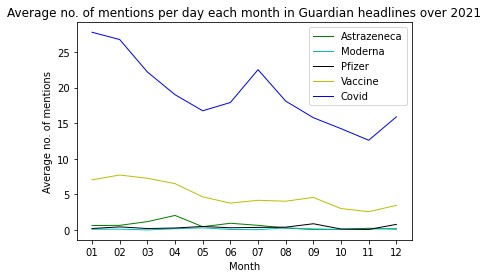

In [11]:
# Plot the results - mean no. of mentions per day
x = g_df4['MonthPublished']

y1 = g_df4['ContainsAz']
y2 = g_df4['ContainsMd']
y3 = g_df4['ContainsPf']
y4 = g_df4['ContainsVaccine']
y5 = g_df4['ContainsCv']

plt.plot(x,y1,'g',label='Astrazeneca', linewidth=1)
plt.plot(x,y2,'c',label='Moderna',linewidth=1)
plt.plot(x,y3,'k',label='Pfizer',linewidth=1)
plt.plot(x,y4,'y',label='Vaccine',linewidth=1)
plt.plot(x,y5,'b',label='Covid',linewidth=1)

plt.title('Average no. of mentions per day each month in Guardian headlines over 2021')
plt.ylabel('Average no. of mentions')
plt.xlabel('Month')

plt.legend()

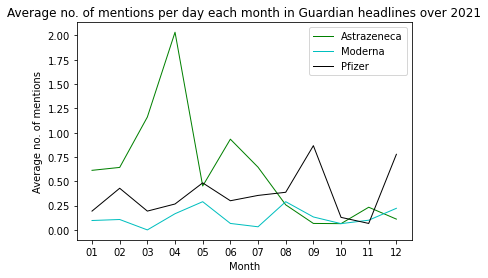

In [12]:
# Plot the results - just the pharmaceutical companies so can see these lines clearer
x = g_df4['MonthPublished']

y1 = g_df4['ContainsAz']
y2 = g_df4['ContainsMd']
y3 = g_df4['ContainsPf']

plt.plot(x,y1,'g',label='Astrazeneca', linewidth=1)
plt.plot(x,y2,'c',label='Moderna',linewidth=1)
plt.plot(x,y3,'k',label='Pfizer',linewidth=1)

plt.title('Average no. of mentions per day each month in Guardian headlines over 2021')
plt.ylabel('Average no. of mentions')
plt.xlabel('Month')

plt.legend()

# Sentiment analysis

## Articles from 2021

### Sentiment analysis of 2021 New York Times abstracts, and saving output CSV to be used for regression analysis

#### Loading 2021 New York Times data from CSV of extracted data

In [13]:
ny_df = pd.read_csv('data/NYTGeneraldata2.csv',parse_dates = ['pub_date'], index_col=0)
ny_df.head()

,abstract,pub_date
0,the united states recorded its 20 millionth ca...,2021-01-01 01:28:22+00:00
1,"throughout the coronavirus pandemic, well-atte...",2021-01-01 03:08:25+00:00
2,a highly contagious coronavirus variant first ...,2021-01-01 03:44:59+00:00
3,the pandemic caused the cancellation of the ro...,2021-01-01 04:24:17+00:00
4,with a new variant of the virus emerging elsew...,2021-01-01 08:00:06+00:00


In [14]:
ny_df.dtypes

abstract                 object
pub_date    datetime64[ns, UTC]
dtype: object

#### Adding date_only column to dataframe

In [15]:
ny_df['date_only']= pd.to_datetime(ny_df['pub_date']).dt.date
ny_df.head()

,abstract,pub_date,date_only
0,the united states recorded its 20 millionth ca...,2021-01-01 01:28:22+00:00,2021-01-01
1,"throughout the coronavirus pandemic, well-atte...",2021-01-01 03:08:25+00:00,2021-01-01
2,a highly contagious coronavirus variant first ...,2021-01-01 03:44:59+00:00,2021-01-01
3,the pandemic caused the cancellation of the ro...,2021-01-01 04:24:17+00:00,2021-01-01
4,with a new variant of the virus emerging elsew...,2021-01-01 08:00:06+00:00,2021-01-01


In [16]:
ny_df.dtypes

abstract                  object
pub_date     datetime64[ns, UTC]
date_only                 object
dtype: object

#### Converting date_only column to datetime object

In [17]:
ny_df['date_only']=pd.to_datetime(ny_df['date_only'])
ny_df.dtypes

abstract                  object
pub_date     datetime64[ns, UTC]
date_only         datetime64[ns]
dtype: object

#### Applying textblob polarity analysis to abstract column 

In [18]:
polarity=lambda x: TextBlob(x).sentiment.polarity
ny_df['Abstract Polarity']=ny_df['abstract'].apply(polarity)
ny_df.head()

,abstract,pub_date,date_only,Abstract Polarity
0,the united states recorded its 20 millionth ca...,2021-01-01 01:28:22+00:00,2021-01-01,-0.107576
1,"throughout the coronavirus pandemic, well-atte...",2021-01-01 03:08:25+00:00,2021-01-01,0.125926
2,a highly contagious coronavirus variant first ...,2021-01-01 03:44:59+00:00,2021-01-01,0.205000
3,the pandemic caused the cancellation of the ro...,2021-01-01 04:24:17+00:00,2021-01-01,0.200000
4,with a new variant of the virus emerging elsew...,2021-01-01 08:00:06+00:00,2021-01-01,0.117677


In [20]:
ny_df.loc[:, "Abstract Polarity"]

0      -0.107576
1       0.125926
2       0.205000
3       0.200000
4       0.117677
          ...   
7951    0.100000
7952    0.146591
7953   -0.008333
7954    0.291667
7955   -0.016667
Name: Abstract Polarity, Length: 7956, dtype: float64

#### Getting the maximum daily polarity in absolute terms and setting it to a new dataframe called daily_abs 

In [22]:
daily = ny_df[['date_only', 'Abstract Polarity']]
daily.loc[:, "Abstract Polarity"] = daily.loc[:, "Abstract Polarity"].abs()
#daily['Abstract Polarity'] = daily['Abstract Polarity'].abs()
daily_new = daily.groupby('date_only').idxmax()
daily_abs = ny_df.iloc[daily_new['Abstract Polarity']]
daily_abs = daily_abs.loc[:,['date_only', 'Abstract Polarity']]

#### Saving daily_abs datafrae to csv to be used for regression analysis

In [23]:
daily_abs.to_csv('data/NYTDailySentiment.csv')

#### Checking saved CSV by reading the file as dataframe

In [24]:
ny_df_filtered = pd.read_csv('data/NYTDailySentiment.csv',parse_dates = ['date_only'])
ny_df_filtered

,Unnamed: 0,date_only,Abstract Polarity
0,8,2021-01-01,0.500000
1,40,2021-01-02,-1.000000
2,41,2021-01-03,0.250000
3,66,2021-01-04,0.318182
4,77,2021-01-05,0.500000
...,...,...,...
329,7871,2021-11-26,0.500000
330,7886,2021-11-27,0.500000
331,7903,2021-11-28,0.750000
332,7925,2021-11-29,0.533333


#### Adding new day_of_week column with day_name to facilitate further analysis

In [25]:
ny_df_filtered['day_of_week']=ny_df_filtered['date_only'].dt.day_name()
ny_df_filtered

,Unnamed: 0,date_only,Abstract Polarity,day_of_week
0,8,2021-01-01,0.500000,Friday
1,40,2021-01-02,-1.000000,Saturday
2,41,2021-01-03,0.250000,Sunday
3,66,2021-01-04,0.318182,Monday
4,77,2021-01-05,0.500000,Tuesday
...,...,...,...,...
329,7871,2021-11-26,0.500000,Friday
330,7886,2021-11-27,0.500000,Saturday
331,7903,2021-11-28,0.750000,Sunday
332,7925,2021-11-29,0.533333,Monday


#### Saving dataframe with day_of_week for regression analysis

In [26]:
ny_df_filtered.to_csv('data/NYTDaily_sentiment_with_day_of_week.csv')

# Articles from November only

### Sentiment analysis of New York Times abstracts and headlines from articles published in November 2021

#### Loading November 2021 New York Times data from CSV of extracted data

In [27]:
nyt_data1 = pd.read_csv('data/NYTGeneraldata1.csv')
nyt_data = nyt_data1[nyt_data1["pub_date"].str.contains("2021-11")]
nyt_data

,Unnamed: 0,abstract,headline,pub_date
6218,6218,about a fifth of the nation’s economy depends ...,thailand reopens to tourists from 63 countries...,2021-11-01 12:26:03+00:00
6219,6219,as some try to lure audiences back with short ...,a 6-hour opera in a pandemic? the met goes for...,2021-11-01 14:14:46+00:00
6220,6220,"while big companies wield considerable power, ...",how the pandemic has added to labor unrest,2021-11-01 15:06:46+00:00
6221,6221,the labor department has completed a draft of ...,the biden administration will publish vaccine ...,2021-11-01 16:29:36+00:00
6222,6222,"after months of production delays, this is the...","the novavax vaccine, backed by operation warp ...",2021-11-01 16:40:48+00:00
...,...,...,...,...
6579,6579,the company said that analyses and modeling of...,regeneron says its antibody treatment may not ...,2021-11-30 16:03:10+00:00
6580,6580,intense research into the new coronavirus vari...,omicron: what is known — and still unknown,2021-11-30 17:08:17+00:00
6581,6581,britain’s approach to coronavirus-related rest...,"amid variant fears, u.k. discovers limits to i...",2021-11-30 18:14:44+00:00
6582,6582,"unlike alpha, beta and delta, the name of the ...",how do you say ‘omicron’?,2021-11-30 18:51:06+00:00


In [29]:
#converting "pub_date" column to datetime object
nyt_data["pub_date"]=pd.to_datetime(nyt_data["pub_date"])
nyt_data

<ipython-input-29-caeba333ae77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt_data["pub_date"]=pd.to_datetime(nyt_data["pub_date"])


,Unnamed: 0,abstract,headline,pub_date
6218,6218,about a fifth of the nation’s economy depends ...,thailand reopens to tourists from 63 countries...,2021-11-01 12:26:03+00:00
6219,6219,as some try to lure audiences back with short ...,a 6-hour opera in a pandemic? the met goes for...,2021-11-01 14:14:46+00:00
6220,6220,"while big companies wield considerable power, ...",how the pandemic has added to labor unrest,2021-11-01 15:06:46+00:00
6221,6221,the labor department has completed a draft of ...,the biden administration will publish vaccine ...,2021-11-01 16:29:36+00:00
6222,6222,"after months of production delays, this is the...","the novavax vaccine, backed by operation warp ...",2021-11-01 16:40:48+00:00
...,...,...,...,...
6579,6579,the company said that analyses and modeling of...,regeneron says its antibody treatment may not ...,2021-11-30 16:03:10+00:00
6580,6580,intense research into the new coronavirus vari...,omicron: what is known — and still unknown,2021-11-30 17:08:17+00:00
6581,6581,britain’s approach to coronavirus-related rest...,"amid variant fears, u.k. discovers limits to i...",2021-11-30 18:14:44+00:00
6582,6582,"unlike alpha, beta and delta, the name of the ...",how do you say ‘omicron’?,2021-11-30 18:51:06+00:00


### Sentiment Analysis on the articles headlines

In [36]:
#defining function for sentiment analysis using TextBlob
def sentiment_func(headline): 
    try: 
        return TextBlob(headline).sentiment 
    except:
        return None

In [37]:
#calling the function 
nyt_data["pol_sub_headline"] = nyt_data["headline"].apply(sentiment_func)

<ipython-input-37-9cf607249975>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt_data["pol_sub_headline"] = nyt_data["headline"].apply(sentiment_func)


In [38]:
#adding a column for polarity and one for subjectivity
nyt_data['polarity_headline'] = [i[0] for i in nyt_data['pol_sub_headline']]
nyt_data['subjectivity_headline'] = [i[1] for i in nyt_data['pol_sub_headline']]

<ipython-input-38-a3991ce3bef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt_data['polarity_headline'] = [i[0] for i in nyt_data['pol_sub_headline']]
<ipython-input-38-a3991ce3bef4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt_data['subjectivity_headline'] = [i[1] for i in nyt_data['pol_sub_headline']]


In [39]:
#deleting column pol_sub
del nyt_data['pol_sub_headline']

#reading text full lenght
pd.set_option('display.max_colwidth', None)

In [40]:
nyt_data

,Unnamed: 0,abstract,headline,pub_date,polarity_headline,subjectivity_headline
6218,6218,"about a fifth of the nation’s economy depends on the vacation industry. before the pandemic, the country was one of the world’s top destinations, drawing nearly 40 million visitors in 2019.",thailand reopens to tourists from 63 countries without requiring quarantine.,2021-11-01 12:26:03+00:00,0.00,0.000000
6219,6219,"as some try to lure audiences back with short programs, the metropolitan opera is staging its longest work: wagner’s “die meistersinger.”",a 6-hour opera in a pandemic? the met goes for it.,2021-11-01 14:14:46+00:00,0.00,0.000000
6220,6220,"while big companies wield considerable power, covid’s economic disruption has given workers new leverage, contributing to a recent upturn in strikes.",how the pandemic has added to labor unrest,2021-11-01 15:06:46+00:00,0.00,0.000000
6221,6221,"the labor department has completed a draft of an emergency standard, which is under review. when it is released, a flurry of corporate vaccine mandates is expected to follow.",the biden administration will publish vaccine mandate rules ‘in the coming days.’,2021-11-01 16:29:36+00:00,0.00,0.000000
6222,6222,"after months of production delays, this is the first vaccine authorization for novavax and its manufacturing partner, the serum institute of india.","the novavax vaccine, backed by operation warp speed, has won its first authorization — in indonesia.",2021-11-01 16:40:48+00:00,0.25,0.333333
...,...,...,...,...,...,...
6579,6579,"the company said that analyses and modeling of mutations in the variant suggest that they may weaken the effect of the treatment, but that studies using omicron’s full sequences are incomplete.","regeneron says its antibody treatment may not be as effective against omicron, but testing is underway.",2021-11-30 16:03:10+00:00,0.60,0.800000
6580,6580,"intense research into the new coronavirus variant first identified in southern africa, has just begun. world leaders have urged people not to panic — and to get vaccinated, if they can.",omicron: what is known — and still unknown,2021-11-30 17:08:17+00:00,-0.10,0.600000
6581,6581,"britain’s approach to coronavirus-related restrictions has been looser than other european countries, but the omicron variant has spurred swift action on mitigation measures.","amid variant fears, u.k. discovers limits to its virus strategy",2021-11-30 18:14:44+00:00,0.00,0.000000
6582,6582,"unlike alpha, beta and delta, the name of the latest known variant is not as straightforward, with some english speakers offering up diverse pronunciations.",how do you say ‘omicron’?,2021-11-30 18:51:06+00:00,0.00,0.000000


In [41]:
#Visualising the mean of the polarity and subjectivity results
mean_polarity_headline = nyt_data['polarity_headline'].mean()
mean_subjectivity_headline = nyt_data['subjectivity_headline'].mean()
print(mean_polarity_headline,mean_subjectivity_headline)

0.02217369834173114 0.18083834539777158


In [42]:
# Creating dataframe containing the polarity value and headline
sentiment_df = pd.DataFrame(nyt_data, columns=["polarity_headline", "headline"])
sentiment_df.head()

,polarity_headline,headline
6218,0.00,thailand reopens to tourists from 63 countries without requiring quarantine.
6219,0.00,a 6-hour opera in a pandemic? the met goes for it.
6220,0.00,how the pandemic has added to labor unrest
6221,0.00,the biden administration will publish vaccine mandate rules ‘in the coming days.’
6222,0.25,"the novavax vaccine, backed by operation warp speed, has won its first authorization — in indonesia."


### Visualising the results

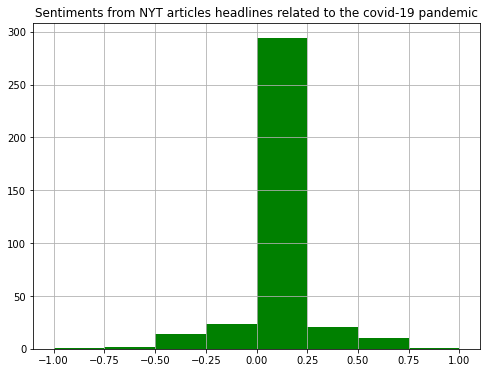

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram 
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="green")

plt.title("Sentiments from NYT articles headlines related to the covid-19 pandemic")
plt.show()

### Sentiment Analysis on the articles abstracts 

In [44]:
#defining function
def sentiment_func(abstract): 
    try: 
        return TextBlob(abstract).sentiment 
    except:
        return None

In [45]:
#calling the function
nyt_data["pol_sub_abstract"] = nyt_data["abstract"].apply(sentiment_func)
nyt_data["pol_sub_abstract"]

<ipython-input-45-8956df904fb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt_data["pol_sub_abstract"] = nyt_data["abstract"].apply(sentiment_func)


6218                                     (0.3, 0.45)
6219                                     (0.0, 0.15)
6220       (0.08727272727272728, 0.2909090909090909)
6221     (-0.03333333333333333, 0.13333333333333333)
6222                      (0.25, 0.3333333333333333)
                            ...                     
6579                                    (0.35, 0.55)
6580       (0.1465909090909091, 0.44696969696969696)
6581    (-0.008333333333333331, 0.15833333333333333)
6582                     (0.2916666666666667, 0.425)
6583                    (-0.016666666666666663, 0.8)
Name: pol_sub_abstract, Length: 366, dtype: object

In [46]:
nyt_data.dropna(inplace = True)

<ipython-input-46-d63119903636>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt_data.dropna(inplace = True)


In [47]:
#adding a column for polarity and one for subjectivity
nyt_data['polarity_abstract'] = [i[0] for i in nyt_data["pol_sub_abstract"]]
nyt_data['subjectivity_abstract'] = [i[1] for i in nyt_data["pol_sub_abstract"]]

<ipython-input-47-84927ae9b637>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt_data['polarity_abstract'] = [i[0] for i in nyt_data["pol_sub_abstract"]]
<ipython-input-47-84927ae9b637>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt_data['subjectivity_abstract'] = [i[1] for i in nyt_data["pol_sub_abstract"]]


In [48]:
#deleting column pol_sub
del nyt_data['pol_sub_abstract']

#reading text full lenght
pd.set_option('display.max_colwidth', None)

nyt_data.head()

,Unnamed: 0,abstract,headline,pub_date,polarity_headline,subjectivity_headline,polarity_abstract,subjectivity_abstract
6218,6218,"about a fifth of the nation’s economy depends on the vacation industry. before the pandemic, the country was one of the world’s top destinations, drawing nearly 40 million visitors in 2019.",thailand reopens to tourists from 63 countries without requiring quarantine.,2021-11-01 12:26:03+00:00,0.00,0.000000,0.300000,0.450000
6219,6219,"as some try to lure audiences back with short programs, the metropolitan opera is staging its longest work: wagner’s “die meistersinger.”",a 6-hour opera in a pandemic? the met goes for it.,2021-11-01 14:14:46+00:00,0.00,0.000000,0.000000,0.150000
6220,6220,"while big companies wield considerable power, covid’s economic disruption has given workers new leverage, contributing to a recent upturn in strikes.",how the pandemic has added to labor unrest,2021-11-01 15:06:46+00:00,0.00,0.000000,0.087273,0.290909
6221,6221,"the labor department has completed a draft of an emergency standard, which is under review. when it is released, a flurry of corporate vaccine mandates is expected to follow.",the biden administration will publish vaccine mandate rules ‘in the coming days.’,2021-11-01 16:29:36+00:00,0.00,0.000000,-0.033333,0.133333
6222,6222,"after months of production delays, this is the first vaccine authorization for novavax and its manufacturing partner, the serum institute of india.","the novavax vaccine, backed by operation warp speed, has won its first authorization — in indonesia.",2021-11-01 16:40:48+00:00,0.25,0.333333,0.250000,0.333333


In [49]:
#Visualising the mean of the polarity and subjectivity results
mean_polarity_abstract = nyt_data['polarity_abstract'].mean()
mean_subjectivity_abstract = nyt_data['subjectivity_abstract'].mean()
print(mean_polarity_abstract,mean_subjectivity_abstract)

0.07235640728343376 0.3130675787057845


In [50]:
# Creating dataframe containing the polarity value and headline
sentiment_df_abstract = pd.DataFrame(nyt_data, columns=["polarity_abstract", "abstract"])
sentiment_df_abstract.head()

,polarity_abstract,abstract
6218,0.300000,"about a fifth of the nation’s economy depends on the vacation industry. before the pandemic, the country was one of the world’s top destinations, drawing nearly 40 million visitors in 2019."
6219,0.000000,"as some try to lure audiences back with short programs, the metropolitan opera is staging its longest work: wagner’s “die meistersinger.”"
6220,0.087273,"while big companies wield considerable power, covid’s economic disruption has given workers new leverage, contributing to a recent upturn in strikes."
6221,-0.033333,"the labor department has completed a draft of an emergency standard, which is under review. when it is released, a flurry of corporate vaccine mandates is expected to follow."
6222,0.250000,"after months of production delays, this is the first vaccine authorization for novavax and its manufacturing partner, the serum institute of india."


### Visualising the results 

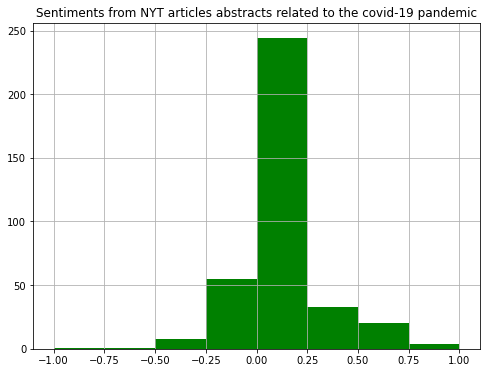

In [51]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram
sentiment_df_abstract.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
                           ax=ax,
                           color="green")

plt.title("Sentiments from NYT articles abstracts related to the covid-19 pandemic")
plt.show()

# New York Times 2021 headline and abstract sentiment analysis with visualisations

### Reading raw New York Times 2021 data from csv

In [52]:
df1 = pd.read_csv('data/raw_data1.csv', parse_dates = ['pub_date'], index_col=0)
df1.head()

,abstract,headline,pub_date,word_count,news_desk,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,keywords,document_type,section_name,byline,type_of_material,_id,uri,subsection_name
4,"the united states recorded its 20 millionth case since the start of the coronavirus pandemic on thursday, surpassing a grim milestone just as the prospects for getting the virus under control quickly in the new year appeared to dim.",the u.s. reaches 20 million cases.,2021-01-01 01:28:22+00:00,438,Foreign,https://www.nytimes.com/2020/12/31/world/the-us-reaches-20-million-cases.html,NaN,"The United States recorded its 20 millionth case since the start of the coronavirus pandemic on Thursday, surpassing a grim milestone just as the prospects for getting the virus under control quickly in the new year appeared to dim.",NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2020/12/31/us/31virus-briefing-20million1/merlin_181267020_67fa7305-6173-4764-87c9-7887d198ea85-articleLarge.jpg', 'height': 400, 'width': 600, 'subType': 'xlarge', 'crop_name': 'articleLarge', 'legacy': {'xlarge': 'images/2020/12/31/us/31virus-briefing-20million1/merlin_181267020_67fa7305-6173-4764-87c9-7887d198ea85-articleLarge.jpg', 'xlargewidth': 600, 'xlargeheight': 400}}, {'rank': 0, 'subtype': 'jumbo', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2020/12/31/us/31virus-briefing-20million1/merlin_181267020_67fa7305-6173-4764-87c9-7887d198ea85-jumbo.jpg', 'height': 683, 'width': 1024, 'subType': 'jumbo', 'crop_name': 'jumbo', 'legacy': {}}, {'rank': 0, 'subtype': 'superJumbo', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2020/12/31/us/31virus-briefing-20million1/merlin_181267020_67fa7305-6173-4764-87c9-7887d198ea85-superJumbo.jpg', 'height': 1365, 'width': 2048, 'subType': 'superJumbo', 'crop_name': 'superJumbo', 'legacy': {}}, {'rank': 0, 'subtype': 'thumbnail', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2020/12/31/us/31virus-briefing-20million1/31virus-briefing-20million1-thumbStandard.jpg', 'height': 75, 'width': 75, 'subType': 'thumbnail', 'crop_name': 'thumbStandard', 'legacy': {'thumbnail': 'images/2020/12/31/us/31virus-briefing-20million1/31virus-briefing-20million1-thumbStandard.jpg', 'thumbnailwidth': 75, 'thumbnailheight': 75}}, {'rank': 0, 'subtype': 'thumbLarge', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2020/12/31/us/31virus-briefing-20million1/31virus-briefing-20million1-thumbLarge.jpg', 'height': 150, 'width': 150, 'subType': 'thumbLarge', 'crop_name': 'thumbLarge', 'legacy': {}}]","[{'name': 'subject', 'value': 'internal-essential', 'rank': 1, 'major': 'N'}]",article,World,"{'original': 'By Kate Taylor', 'person': [{'firstname': 'Kate', 'middlename': None, 'lastname': 'Taylor', 'qualifier': None, 'title': None, 'role': 'reported', 'organization': '', 'rank': 1}], 'organization': None}",News,nyt://article/d75205a5-201f-5dc3-b8fe-278c3d645537,nyt://article/d75205a5-201f-5dc3-b8fe-278c3d645537,NaN
7,"throughout the coronavirus pandemic, well-attended parties have mostly been shut down across los angeles, which has led to a culture of secrecy on social media.","shhh! in los angeles, new year’s eve parties are still happening.",2021-01-01 03:08:25+00:00,279,National,https://www.nytimes.com/2020/12/31/us/shhh-in-los-angeles-new-years-eve-parties-are-still-happening.html,NaN,"Throughout the coronavirus pandemic, well-attended parties have mostly been shut down across Los Angeles, which has led to a culture of secrecy on social media.",NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': None, 'credit': None, 'type': 'image', 'url': 'images/2020/12/31/lens/31nye-briefing-secret-parties-lax/merlin_181833603_3f9d3966-531d-48ed-a48c-d0b54bd13d04-articleLarge.jpg', 'height': 400, 'width': 600, 'subType': 'xlarge', 'crop_name': 'articleLarge', 'legacy': {'xlarge': 'images/20

### Extracting more relevant columns for new dataframe to aid more in depth analysis

In [53]:
df3=df1.filter(['abstract','headline','pub_date','word_count','news_desk','section_name'])
df3.head()

,abstract,headline,pub_date,word_count,news_desk,section_name
4,"the united states recorded its 20 millionth case since the start of the coronavirus pandemic on thursday, surpassing a grim milestone just as the prospects for getting the virus under control quickly in the new year appeared to dim.",the u.s. reaches 20 million cases.,2021-01-01 01:28:22+00:00,438,Foreign,World
7,"throughout the coronavirus pandemic, well-attended parties have mostly been shut down across los angeles, which has led to a culture of secrecy on social media.","shhh! in los angeles, new year’s eve parties are still happening.",2021-01-01 03:08:25+00:00,279,National,U.S.
11,"a highly contagious coronavirus variant first identified in britain has been discovered in florida, health officials said on thursday.",florida health officials detect the state’s first identified coronavirus variant case.,2021-01-01 03:44:59+00:00,265,Foreign,World
12,"the pandemic caused the cancellation of the rose parade, an institution since 1890, for the first time since world war ii.",no rose parade: southern california laments the loss of a tradition.,2021-01-01 04:24:17+00:00,488,National,U.S.
16,"with a new variant of the virus emerging elsewhere in the country, it’s crucial to vaccinate new yorkers quickly. but so far, only about 88,000 have received the shots.",virus numbers are surging. why is new york’s vaccine rollout sluggish?,2021-01-01 08:00:06+00:00,1541,Metro,New York


### Resetting index

In [54]:
df3.reset_index(drop=True, inplace=True)

### Add date only column


In [55]:
df3['date_only']= pd.to_datetime(df3['pub_date']).dt.date
df3['date_only']=pd.to_datetime(df3['date_only'])
df3.head()

,abstract,headline,pub_date,word_count,news_desk,section_name,date_only
0,"the united states recorded its 20 millionth case since the start of the coronavirus pandemic on thursday, surpassing a grim milestone just as the prospects for getting the virus under control quickly in the new year appeared to dim.",the u.s. reaches 20 million cases.,2021-01-01 01:28:22+00:00,438,Foreign,World,2021-01-01
1,"throughout the coronavirus pandemic, well-attended parties have mostly been shut down across los angeles, which has led to a culture of secrecy on social media.","shhh! in los angeles, new year’s eve parties are still happening.",2021-01-01 03:08:25+00:00,279,National,U.S.,2021-01-01
2,"a highly contagious coronavirus variant first identified in britain has been discovered in florida, health officials said on thursday.",florida health officials detect the state’s first identified coronavirus variant case.,2021-01-01 03:44:59+00:00,265,Foreign,World,2021-01-01
3,"the pandemic caused the cancellation of the rose parade, an institution since 1890, for the first time since world war ii.",no rose parade: southern california laments the loss of a tradition.,2021-01-01 04:24:17+00:00,488,National,U.S.,2021-01-01
4,"with a new variant of the virus emerging elsewhere in the country, it’s crucial to vaccinate new yorkers quickly. but so far, only about 88,000 have received the shots.",virus numbers are surging. why is new york’s vaccine rollout sluggish?,2021-01-01 08:00:06+00:00,1541,Metro,New York,2021-01-01


### Using textblob to analyse polarity and subjectivity of abstract and headline¶

In [56]:
polarity=lambda x: TextBlob(x).sentiment.polarity
subjectivity=lambda x: TextBlob(x).sentiment.subjectivity
df3['Abstract Polarity']=df3['abstract'].apply(polarity)
df3['Abstract Subjectivity']=df3['abstract'].apply(subjectivity)
df3['Headline Polarity']=df3['headline'].apply(polarity)
df3['Headline Subjectivity']=df3['headline'].apply(subjectivity)
df3.head()

,abstract,headline,pub_date,word_count,news_desk,section_name,date_only,Abstract Polarity,Abstract Subjectivity,Headline Polarity,Headline Subjectivity
0,"the united states recorded its 20 millionth case since the start of the coronavirus pandemic on thursday, surpassing a grim milestone just as the prospects for getting the virus under control quickly in the new year appeared to dim.",the u.s. reaches 20 million cases.,2021-01-01 01:28:22+00:00,438,Foreign,World,2021-01-01,-0.107576,0.613636,0.000000,0.000000
1,"throughout the coronavirus pandemic, well-attended parties have mostly been shut down across los angeles, which has led to a culture of secrecy on social media.","shhh! in los angeles, new year’s eve parties are still happening.",2021-01-01 03:08:25+00:00,279,National,U.S.,2021-01-01,0.125926,0.285185,0.136364,0.454545
2,"a highly contagious coronavirus variant first identified in britain has been discovered in florida, health officials said on thursday.",florida health officials detect the state’s first identified coronavirus variant case.,2021-01-01 03:44:59+00:00,265,Foreign,World,2021-01-01,0.205000,0.436667,0.250000,0.333333
3,"the pandemic caused the cancellation of the rose parade, an institution since 1890, for the first time since world war ii.",no rose parade: southern california laments the loss of a tradition.,2021-01-01 04:24:17+00:00,488,National,U.S.,2021-01-01,0.200000,0.505556,-0.183333,0.394444
4,"with a new variant of the virus emerging elsewhere in the country, it’s crucial to vaccinate new yorkers quickly. but so far, only about 88,000 have received the shots.",virus numbers are surging. why is new york’s vaccine rollout sluggish?,2021-01-01 08:00:06+00:00,1541,Metro,New York,2021-01-01,0.117677,0.734848,0.136364,0.454545


### Checking for null values

In [58]:
df3.isnull().sum()

abstract                   0
headline                   0
pub_date                   0
word_count                 0
news_desk                242
section_name              45
date_only                  0
Abstract Polarity          0
Abstract Subjectivity      0
Headline Polarity          0
Headline Subjectivity      0
dtype: int64

### Creating new dataframe df1 which drops all null values from df

In [59]:
df_new = df3.dropna(axis=0)
df_new.isnull().sum()

abstract                 0
headline                 0
pub_date                 0
word_count               0
news_desk                0
section_name             0
date_only                0
Abstract Polarity        0
Abstract Subjectivity    0
Headline Polarity        0
Headline Subjectivity    0
dtype: int64

### Plotting sentiment analysis data

/Users/ruijin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


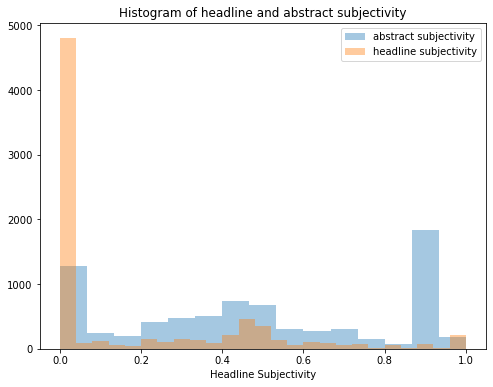

In [60]:
plt.figure(figsize=(8,6))
sns.distplot(a=df_new['Abstract Subjectivity'],label="abstract subjectivity", kde=False)
sns.distplot(a=df_new['Headline Subjectivity'],label="headline subjectivity", kde=False)
plt.title('Histogram of headline and abstract subjectivity')
plt.legend()

#### Plot 1 result interpretation : the headlines in New York Times are more objective than the astract. Headline subjectivity is unimodal, with one peak at 0.0 (very objective), while abstract subjectivity is multi-modal, with two peaks one at 0.0 and another around 0.9 (very subjective)

### Plot2: Histogram of headline and abstract polarity

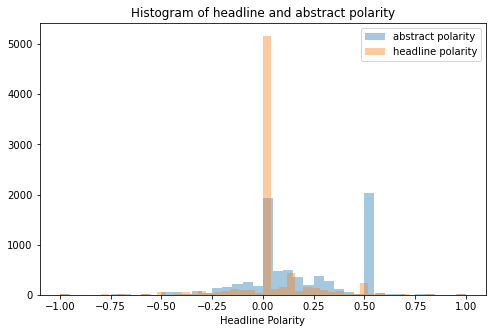

In [61]:
plt.figure(figsize=(8,5))
sns.distplot(a=df_new['Abstract Polarity'],label="abstract polarity", kde=False)
sns.distplot(a=df_new['Headline Polarity'],label="headline polarity", kde=False)
plt.title('Histogram of headline and abstract polarity')
plt.legend()

#### Histogram result interpretation: headline polarity has a single mode, at 0.00,which is neutral polarity. While abstract polarity is multi-modal, peaking at 0.00 and 0.50. Therefore, abstract polarity tends to contain more positive sentiment when compared to the headline. 

### Addings month and day of week columns to dataframe to find patterns in sentiment throughout the different months and days of weeks

In [62]:
df_new['month'] = pd.DatetimeIndex(df_new['date_only']).month
df_new['day_of_week']=df_new['date_only'].dt.day_name()
df_new.tail()

<ipython-input-62-50116ae8554a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = pd.DatetimeIndex(df_new['date_only']).month
<ipython-input-62-50116ae8554a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['day_of_week']=df_new['date_only'].dt.day_name()


,abstract,headline,pub_date,word_count,news_desk,section_name,date_only,Abstract Polarity,Abstract Subjectivity,Headline Polarity,Headline Subjectivity,month,day_of_week
7951,"slowed but not stopped by the pandemic, wilson has had a busy fall that continues with his production of “turandot” at the paris opera.","at 80, robert wilson holds on to a singular vision for the stage",2021-11-30 16:14:32+00:00,1231,Culture,Arts,2021-11-30,0.100000,0.300000,0.0,0.0,11,Tuesday
7952,"intense research into the new coronavirus variant first identified in southern africa, has just begun. world leaders have urged people not to panic — and to get vaccinated, if they can.",omicron: what is known — and still unknown,2021-11-30 17:08:17+00:00,1331,Science,Health,2021-11-30,0.146591,0.446970,-0.1,0.6,11,Tuesday
7953,"britain’s approach to coronavirus-related restrictions has been looser than other european countries, but the omicron variant has spurred swift action on mitigation measures.","amid variant fears, u.k. discovers limits to its virus strategy",2021-11-30 18:14:44+00:00,1219,Foreign,World,2021-11-30,-0.008333,0.158333,0.0,0.0,11,Tuesday
7954,"unlike alpha, beta and delta, the name of the latest known variant is not as straightforward, with some english speakers offering up diverse pronunciations.",how do you say ‘omicron’?,2021-11-30 18:51:06+00:00,287,Express,World,2021-11-30,0.291667,0.425000,0.0,0.0,11,Tuesday
7955,the centers for disease control and prevention was “actively looking” for the variant but had not found a case so far.,federal health officials say that they are expanding the search for omicron in the u.s.,2021-11-30 19:34:18+00:00,619,Washington,U.S.,2021-11-30,-0.016667,0.800000,0.0,0.0,11,Tuesday


### plotting subjectivity using month and day of week columns

### Barcharts of headline and abstract subjectivity for each month

Text(0, 0.5, 'Mean abstract subjectivity')

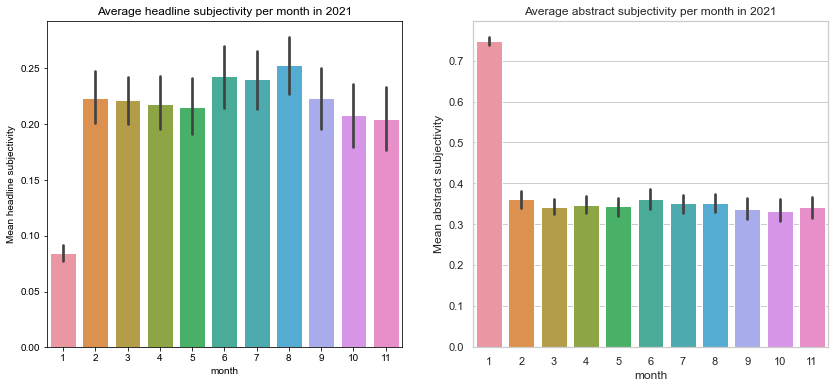

In [63]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set_theme(style="whitegrid")
plt.title('Average headline subjectivity per month in 2021')
sns.barplot(x=df_new['month'],y=df_new['Headline Subjectivity'])
plt.ylabel('Mean headline subjectivity')

plt.subplot(1,2,2)
sns.set_theme(style="whitegrid")
plt.title('Average abstract subjectivity per month in 2021')
sns.barplot(x=df_new['month'],y=df_new['Abstract Subjectivity'])
plt.ylabel('Mean abstract subjectivity')

#### Interpretation of chart: headline and abstract subjectivity tends to be constant throughout different months of the year, which is fairly objective

#### Only outlier is january, which is extremely objective at below 0.10

### Identifying source of outlier, counting the number of data points per month

In [64]:
monthly_count=df_new.groupby('month').size()
monthly_count

month
1     2600
2      595
3      679
4      600
5      534
6      443
7      503
8      487
9      433
10     384
11     411
dtype: int64

#### When we do a count on the number of data points per month we see there are 2600 data points for January which is far higher than all other months.This could be a reason for January's subjectivity being an outlier

### Barchart of headline and abstract subjectivity for days of week

Text(0, 0.5, 'Mean abstract subjectivity')

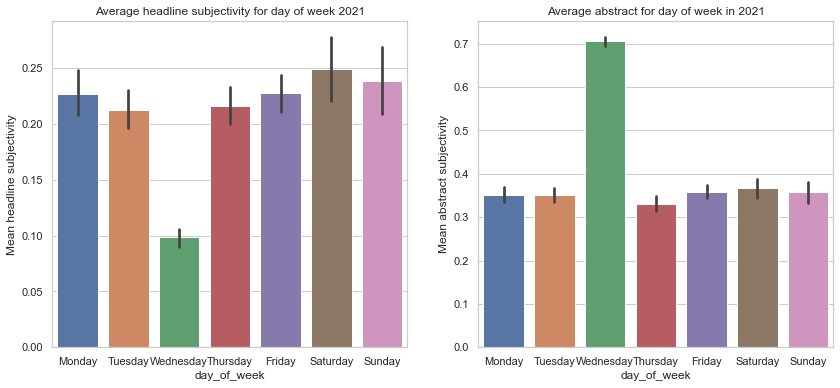

In [65]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.set_theme(style="whitegrid")
plt.title('Average headline subjectivity for day of week 2021')
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
sns.barplot(x=df_new['day_of_week'],y=df_new['Headline Subjectivity'], order=order )
plt.ylabel('Mean headline subjectivity')

plt.subplot(1,2,2)
sns.set_theme(style="whitegrid")
plt.title('Average abstract for day of week in 2021')
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
sns.barplot(x=df_new['day_of_week'],y=df_new['Abstract Subjectivity'],order=order)
plt.ylabel('Mean abstract subjectivity')

#### Wednesday seems to be the outlier here, while the subjectivity is fairly consistent throughout the rest of the days of the week

### Counting the number of data points for each day of week

In [66]:
weekly_count = df_new.groupby('day_of_week').size()
weekly_count

day_of_week
Friday       1154
Monday        832
Saturday      419
Sunday        388
Thursday     1047
Tuesday       958
Wednesday    2871
dtype: int64

#### Similar to do we did a count by month, when calling a weekly count, we see that Wednesday has significantly more data points compared to all other days of the week. This could be the reason why Wednesday is an outlier in our subjectivity plots. 

### Plotting sentiment data in relation to news desk and section names to see if sentiment varies depending on the which section of the media outlet it is covered

### Getting the top 10 'news desks' from our dataframe which contains COVID related coverage

In [67]:
top_10_news_desk = df_new['news_desk'].value_counts().head(10)
top_10_news_desk

U.S.          2001
Foreign       1248
Business       469
National       402
Washington     373
Science        362
Metro          270
OpEd           249
NYTNow         234
Culture        210
Name: news_desk, dtype: int64

### Creating new dataframe with top 10 news desks

In [68]:
top_10_news_desks = ['U.S.','Foreign','Business','National','Washington','Science','Metro','OpEd','NYTNow','Culture']
top_10_news_desks_df = df_new[df_new.news_desk.isin(top_10_news_desks)]
top_10_news_desks_df.shape

(5818, 13)

In [69]:
top_10_news_desks_df.head()

,abstract,headline,pub_date,word_count,news_desk,section_name,date_only,Abstract Polarity,Abstract Subjectivity,Headline Polarity,Headline Subjectivity,month,day_of_week
0,"the united states recorded its 20 millionth case since the start of the coronavirus pandemic on thursday, surpassing a grim milestone just as the prospects for getting the virus under control quickly in the new year appeared to dim.",the u.s. reaches 20 million cases.,2021-01-01 01:28:22+00:00,438,Foreign,World,2021-01-01,-0.107576,0.613636,0.000000,0.000000,1,Friday
1,"throughout the coronavirus pandemic, well-attended parties have mostly been shut down across los angeles, which has led to a culture of secrecy on social media.","shhh! in los angeles, new year’s eve parties are still happening.",2021-01-01 03:08:25+00:00,279,National,U.S.,2021-01-01,0.125926,0.285185,0.136364,0.454545,1,Friday
2,"a highly contagious coronavirus variant first identified in britain has been discovered in florida, health officials said on thursday.",florida health officials detect the state’s first identified coronavirus variant case.,2021-01-01 03:44:59+00:00,265,Foreign,World,2021-01-01,0.205000,0.436667,0.250000,0.333333,1,Friday
3,"the pandemic caused the cancellation of the rose parade, an institution since 1890, for the first time since world war ii.",no rose parade: southern california laments the loss of a tradition.,2021-01-01 04:24:17+00:00,488,National,U.S.,2021-01-01,0.200000,0.505556,-0.183333,0.394444,1,Friday
4,"with a new variant of the virus emerging elsewhere in the country, it’s crucial to vaccinate new yorkers quickly. but so far, only about 88,000 have received the shots.",virus numbers are surging. why is new york’s vaccine rollout sluggish?,2021-01-01 08:00:06+00:00,1541,Metro,New York,2021-01-01,0.117677,0.734848,0.136364,0.454545,1,Friday


### Plotting the headline and abtract subjectivity for each New York Times News Desks

Text(0, 0.5, 'Mean abstract subjectivity')

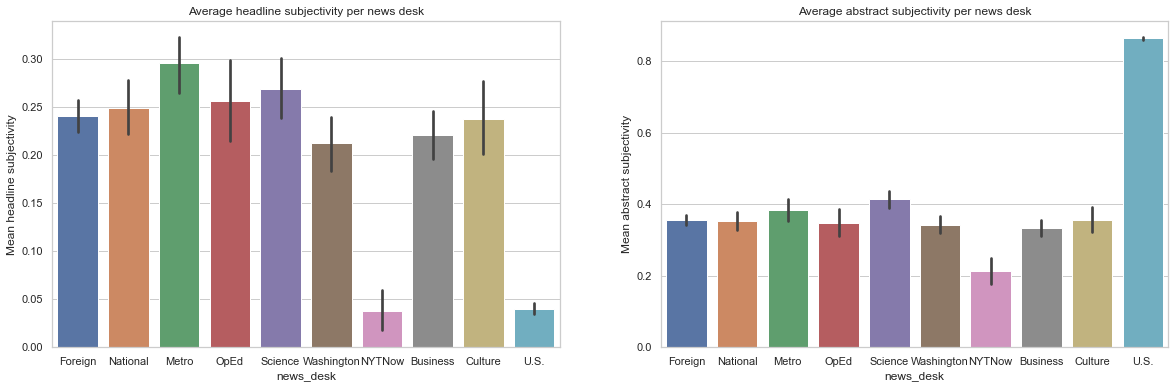

In [70]:
plt.figure(figsize=(20,6))
sns.set_theme(style="whitegrid")
plt.subplot(1,2,1)
plt.title('Average headline subjectivity per news desk')
sns.barplot(x=top_10_news_desks_df['news_desk'],y=top_10_news_desks_df['Headline Subjectivity'])
plt.ylabel('Mean headline subjectivity')

plt.subplot(1,2,2)
plt.title('Average abstract subjectivity per news desk')
sns.barplot(x=top_10_news_desks_df['news_desk'],y=top_10_news_desks_df['Abstract Subjectivity'])
plt.ylabel('Mean abstract subjectivity')


#### Interpretation: for both headline and abstract subjectivity, NYTNow news desk appears to be the most objective. The U.S. desk appears to be an outlier given the extremity of the subjectivity value. From our top_10_news_desks count, we see that the U.S. news section has by far the most data points, that could be a cause for the outlier. (similar to our monthly and weekly analysis)

### Extracting top 10 sections with COVID coverage

In [71]:
top_10_sections = df_new['section_name'].value_counts().head(10)
top_10_sections

U.S.            3024
World           1330
Business Day     452
Opinion          364
Health           341
New York         308
Sports           207
Well             203
Arts             201
Briefing         173
Name: section_name, dtype: int64

### Create new dataframe with top 10 sections

In [72]:
top_10_sections = ['U.S.','World','Business Day','Opinion','Health','New York','Sports','Well','Arts','Briefing']
top_10_sections_df = df_new[df_new.section_name.isin(top_10_sections)]
top_10_sections_df.shape

(6603, 13)

In [73]:
top_10_sections_df.head()

,abstract,headline,pub_date,word_count,news_desk,section_name,date_only,Abstract Polarity,Abstract Subjectivity,Headline Polarity,Headline Subjectivity,month,day_of_week
0,"the united states recorded its 20 millionth case since the start of the coronavirus pandemic on thursday, surpassing a grim milestone just as the prospects for getting the virus under control quickly in the new year appeared to dim.",the u.s. reaches 20 million cases.,2021-01-01 01:28:22+00:00,438,Foreign,World,2021-01-01,-0.107576,0.613636,0.000000,0.000000,1,Friday
1,"throughout the coronavirus pandemic, well-attended parties have mostly been shut down across los angeles, which has led to a culture of secrecy on social media.","shhh! in los angeles, new year’s eve parties are still happening.",2021-01-01 03:08:25+00:00,279,National,U.S.,2021-01-01,0.125926,0.285185,0.136364,0.454545,1,Friday
2,"a highly contagious coronavirus variant first identified in britain has been discovered in florida, health officials said on thursday.",florida health officials detect the state’s first identified coronavirus variant case.,2021-01-01 03:44:59+00:00,265,Foreign,World,2021-01-01,0.205000,0.436667,0.250000,0.333333,1,Friday
3,"the pandemic caused the cancellation of the rose parade, an institution since 1890, for the first time since world war ii.",no rose parade: southern california laments the loss of a tradition.,2021-01-01 04:24:17+00:00,488,National,U.S.,2021-01-01,0.200000,0.505556,-0.183333,0.394444,1,Friday
4,"with a new variant of the virus emerging elsewhere in the country, it’s crucial to vaccinate new yorkers quickly. but so far, only about 88,000 have received the shots.",virus numbers are surging. why is new york’s vaccine rollout sluggish?,2021-01-01 08:00:06+00:00,1541,Metro,New York,2021-01-01,0.117677,0.734848,0.136364,0.454545,1,Friday


### Plotting headline subjectivity for each New York Times Section

Text(0, 0.5, 'Mean abstract subjectivity')

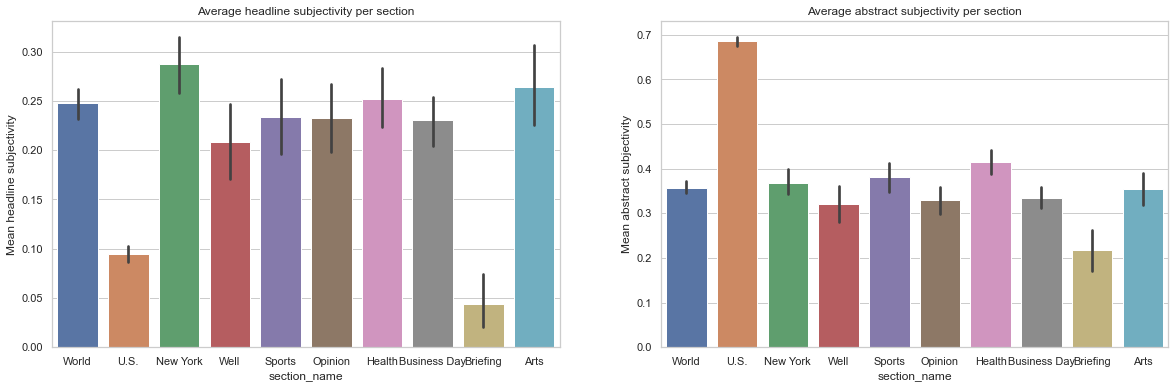

In [74]:
plt.figure(figsize=(20,6))
sns.set_theme(style="whitegrid")
plt.subplot(1,2,1)
plt.title('Average headline subjectivity per section')
sns.barplot(x=top_10_sections_df['section_name'],y=top_10_sections_df['Headline Subjectivity'])
plt.ylabel('Mean headline subjectivity')

plt.subplot(1,2,2)
plt.title('Average abstract subjectivity per section')
sns.barplot(x=top_10_sections_df['section_name'],y=top_10_sections_df['Abstract Subjectivity'])
plt.ylabel('Mean abstract subjectivity')

#### Interpretation: the U.S section appears to be an outlier, while the abstract and headline subjectivity of the other top 10 sections appear to be quite uniform, with the 'Briefing' section being the most objective. 

### 2021 NYT sentiment analysis findings: 

1: From the histograms, we see that the New York Times headlines tend to be both more objective and have a more neutral sentiment (polarity) when compared to abstracts

2:  When grouping our data by the month, we see that the headline and abstract subjectivity are consistent throughout the different months in 2021. With the notable exception of January, which is an outlier. In an attempt to identify why January is an outlier, we did a monthly count on the number of data points per month, we saw that January had significant more data points compared to all other months in 2021. This could be one reason why the January subjectivity data is skewed. 

3: When grouping data by the days of week, we saw that Wednesday was the notable outlier, where the headline subjectivity is significantly lower compared to all other days of week, while the abstract subjectivity is much higher compared to other days of the week. When we did a weekly count of the number of data points per day of week, we saw that Wednesday had more data points when compared to other days of the week. Similar to our monthly analysis, the higher data points for Wednesday could be a reason why it is an outlier. 

4: We then went onto analysising whether different news desks vary in their headline/abstract subjectivity. The 'U.S.' news desk appears to be an outlier, especially in abstract subjectivity. This could again be related to how the U.S. news desk has significantly more data points than all over news desks. Outside of the U.S. news desk outlier, the NYTNow news desk has the most objective headlines and abstracts, according to the Textblob analysis. 

5: We find similar patterns when plotting subjectivity and 'sections' of the New York Times, where the "U.S." section appears to be an outlier again. 

# Exploratory analysis

## Yearly

#### We use the loaded yearly data for the NYT sentiment analysis setting the date as index  and dropping the columns that are of no interest to us

In [75]:
nyt = ny_df_filtered.set_index("date_only")
nyt.drop(["Unnamed: 0", "day_of_week"], axis = 1, inplace = True)
nyt.rename(columns = {'Abstract Polarity':'abstract_polarity'}, inplace=True)
nyt

,abstract_polarity
date_only,
2021-01-01,0.500000
2021-01-02,-1.000000
2021-01-03,0.250000
2021-01-04,0.318182
2021-01-05,0.500000
...,...
2021-11-26,0.500000
2021-11-27,0.500000
2021-11-28,0.750000


In [163]:
# We create a dummy for positive change = 1 and negative change = 0 in news sentiment
nyt['polarity_trend'] = 1 * (nyt['abstract_polarity'] > 0)

#### we show the frequency of positive and negative sentiment detected in the news with a bar plot

/Users/ruijin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


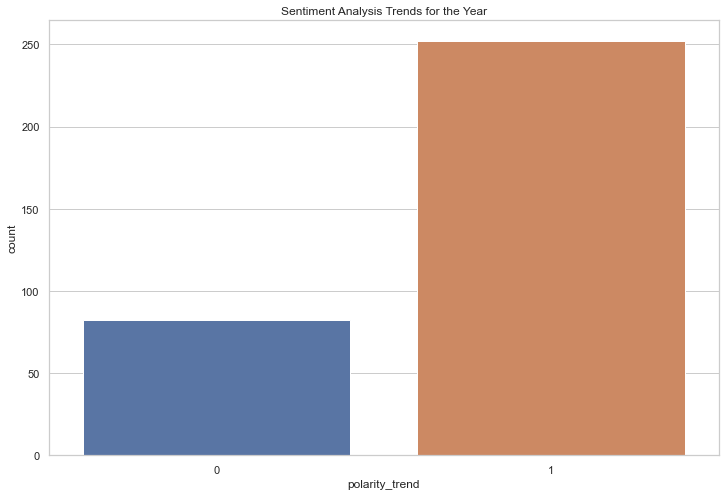

In [164]:
ax=plt.subplots(1,1,figsize=(12,8))
sns.countplot('polarity_trend',data=nyt)
plt.title("Sentiment Analysis Trends for the Year")
plt.show()

#### We use the loaded yearly data for the Guardian occurrence analysis setting the date as index  and dropping the columns that are of no interest to us

In [76]:
g_df3 = g_df3[g_df3['DatePublished'] <= datetime.date(2021, 11, 30)]
g_df3.set_index("DatePublished", inplace = True)
g_df3

,ContainsAz,ContainsPf,ContainsMd,ContainsVaccine,ContainsCv,MonthPublished
DatePublished,,,,,,
2021-01-01,2,0,0,6,24,01
2021-01-02,2,0,0,5,22,01
2021-01-03,0,0,0,14,29,01
2021-01-04,0,0,0,1,24,01
2021-01-05,0,0,1,7,42,01
...,...,...,...,...,...,...
2021-11-26,0,0,0,4,23,11
2021-11-27,0,0,0,0,10,11
2021-11-28,0,0,0,2,12,11


#### We load the yearly financial data for the three pharmaceutical companies, run some exploratory anlayses and merge the these with the sentiment and occurrence analyses datasets.

### Moderna

In [77]:
# we load and sort the data
df_mrna = pd.read_csv('data/MRNA_close.csv', index_col=1, parse_dates=['timestamp']) #read the Moderna data
df_mrna.sort_values("timestamp", inplace = True)
df_mrna.head()

,Unnamed: 0,day_of_week,adjusted_close,change
timestamp,,,,
2021-01-04 00:00:00+00:00,0,Monday,111.73,NaN
2021-01-05 00:00:00+00:00,1,Tuesday,109.18,-0.022823
2021-01-06 00:00:00+00:00,2,Wednesday,116.26,0.064847
2021-01-07 00:00:00+00:00,3,Thursday,115.09,-0.010064
2021-01-08 00:00:00+00:00,4,Friday,112.75,-0.020332


In [78]:
df_mrna.dropna(inplace = True)# drop rows where the vlaues are null
df_mrna.drop(['Unnamed: 0','day_of_week'], axis=1, inplace=True)# drop columns that are of no use

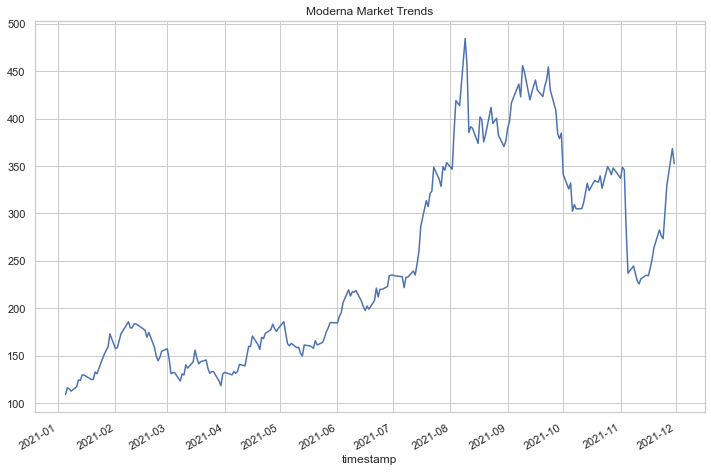

In [79]:
df_mrna['adjusted_close'].plot(figsize=(12,8))
plt.title("Moderna Market Trends")
plt.show() # plot the adjusted close data to look at the maket trends overtime 

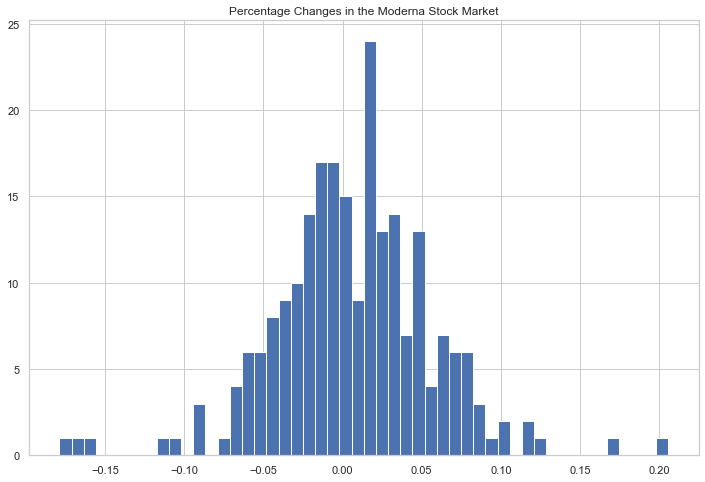

In [80]:
df_mrna['change'].hist(bins=50, figsize=(12,8))
plt.title("Percentage Changes in the Moderna Stock Market")
plt.show() #plot a hitsogram of the percentage changes to look at their distribution

In [81]:
df_mrna['trend'] = 1 * (df_mrna['change'] > 0) #crate a dummy for positive chhnage = 1 and negative change = 0
df_mrna

,adjusted_close,change,trend
timestamp,,,
2021-01-05 00:00:00+00:00,109.18,-0.022823,0
2021-01-06 00:00:00+00:00,116.26,0.064847,1
2021-01-07 00:00:00+00:00,115.09,-0.010064,0
2021-01-08 00:00:00+00:00,112.75,-0.020332,0
2021-01-11 00:00:00+00:00,117.26,0.040000,1
...,...,...,...
2021-11-23 00:00:00+00:00,276.38,-0.022321,0
2021-11-24 00:00:00+00:00,273.39,-0.010818,0
2021-11-26 00:00:00+00:00,329.63,0.205713,1


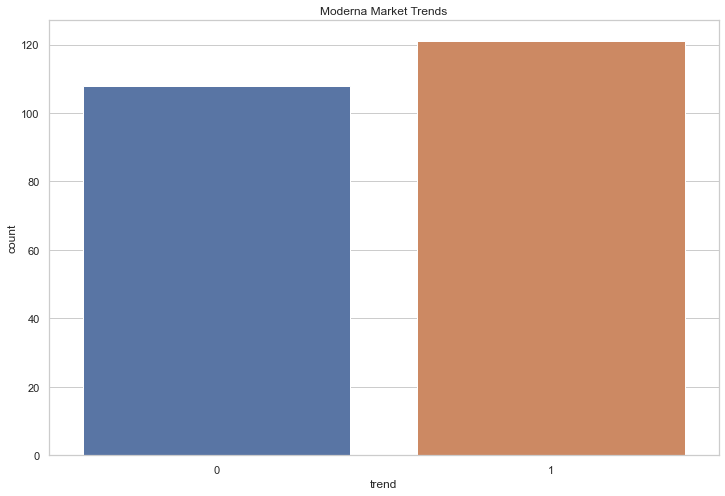

In [82]:
ax=plt.subplots(1,1,figsize=(12,8))
sns.countplot(x='trend',data=df_mrna) # we show the frequency of positive and negative changes with bar plot 
plt.title("Moderna Market Trends")
plt.show()

In [83]:
# we merge the finance, sentiment and occurrence analysis datasets 
nyt.index = pd.to_datetime(nyt.index).tz_localize('Etc/UCT')
g_df3.index = pd.to_datetime(g_df3.index).tz_localize('Etc/UCT')
df = df_mrna.merge(nyt, how='inner', left_index=True, right_index=True)
df_m = df.merge(g_df3, how='inner', left_index=True, right_index=True)

### Pfizer

In [84]:
# we load and sort the data
df_pfe = pd.read_csv('data/PFE_close.csv', index_col=1, parse_dates=['timestamp']) #read the Pfizer data 
df_pfe.sort_values("timestamp", inplace = True)#order the dataset by date
df_pfe.head()#show the first five rows of the dataset

,Unnamed: 0,day_of_week,adjusted_close,change
timestamp,,,,
2021-01-04 00:00:00+00:00,0,Monday,35.414547,NaN
2021-01-05 00:00:00+00:00,1,Tuesday,35.780142,0.010323
2021-01-06 00:00:00+00:00,2,Wednesday,35.472273,-0.008604
2021-01-07 00:00:00+00:00,3,Thursday,35.655070,0.005153
2021-01-08 00:00:00+00:00,4,Friday,35.722416,0.001889


In [85]:
df_pfe.dropna(inplace = True)# drop rows where the vlaue is null
df_pfe.drop(['Unnamed: 0', 'day_of_week'], axis=1, inplace=True)# drop Unnamed: 0 column as it is of no use

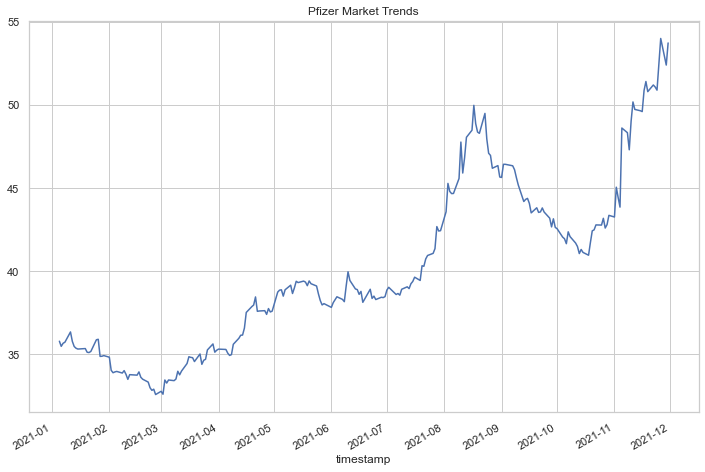

In [86]:
df_pfe['adjusted_close'].plot(figsize=(12,8))
plt.title("Pfizer Market Trends")
plt.show() # plot the adjusted close data to look at the maket trends overtime 

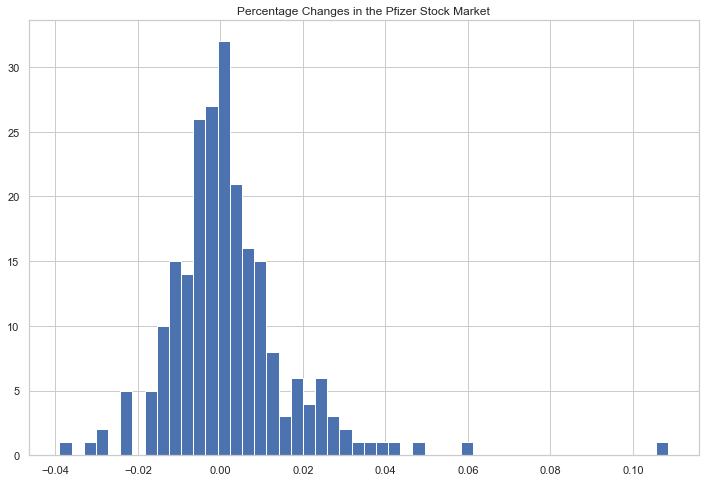

In [87]:
df_pfe['change'].hist(bins=50, figsize=(12,8))
plt.title("Percentage Changes in the Pfizer Stock Market")
plt.show() #plot a hitsogram of the percentage changes to look at their distribution

In [88]:
df_pfe['trend'] = 1 * (df_pfe['change'] > 0) #crate a dummy for positive chhnage = 1 and negative change = 0
df_pfe

,adjusted_close,change,trend
timestamp,,,
2021-01-05 00:00:00+00:00,35.780142,0.010323,1
2021-01-06 00:00:00+00:00,35.472273,-0.008604,0
2021-01-07 00:00:00+00:00,35.655070,0.005153,1
2021-01-08 00:00:00+00:00,35.722416,0.001889,1
2021-01-11 00:00:00+00:00,36.338154,0.017237,1
...,...,...,...
2021-11-23 00:00:00+00:00,51.080000,-0.002344,0
2021-11-24 00:00:00+00:00,50.890000,-0.003720,0
2021-11-26 00:00:00+00:00,54.000000,0.061112,1


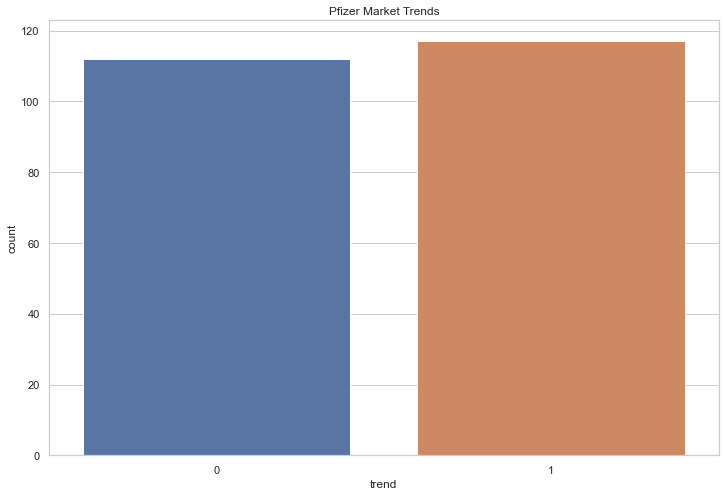

In [89]:
ax=plt.subplots(1,1,figsize=(12,8))
sns.countplot(x='trend',data=df_pfe)# we show the frequency of positive and negative changes with bar plot 
plt.title("Pfizer Market Trends")
plt.show()

In [90]:
# we merge the finance, sentiment and occurrence analysis datasets
df = df_pfe.merge(nyt, how='inner', left_index=True, right_index=True)
df_p = df.merge(g_df3, how='inner', left_index=True, right_index=True)

### AstraZeneca 

In [91]:
# we load and sort the data
df_azn = pd.read_csv('data/AZN_close.csv', index_col=1, parse_dates=['timestamp']) #read the Astrazeneca data
df_azn.sort_values("timestamp", inplace = True) #order the dataset by date
df_azn.head() #show the first five rows of the dataset

,Unnamed: 0,day_of_week,adjusted_close,change
timestamp,,,,
2021-01-04 00:00:00+00:00,0,Monday,49.200558,NaN
2021-01-05 00:00:00+00:00,1,Tuesday,49.375857,0.003563
2021-01-06 00:00:00+00:00,2,Wednesday,49.580372,0.004142
2021-01-07 00:00:00+00:00,3,Thursday,48.879177,-0.014143
2021-01-08 00:00:00+00:00,4,Friday,49.531678,0.013349


In [92]:
df_azn.dropna(inplace = True)# drop rows where the vlaue is null
df_azn.drop(['Unnamed: 0', 'day_of_week'], axis=1, inplace=True)# drop Unnamed: 0 column as it is of no use

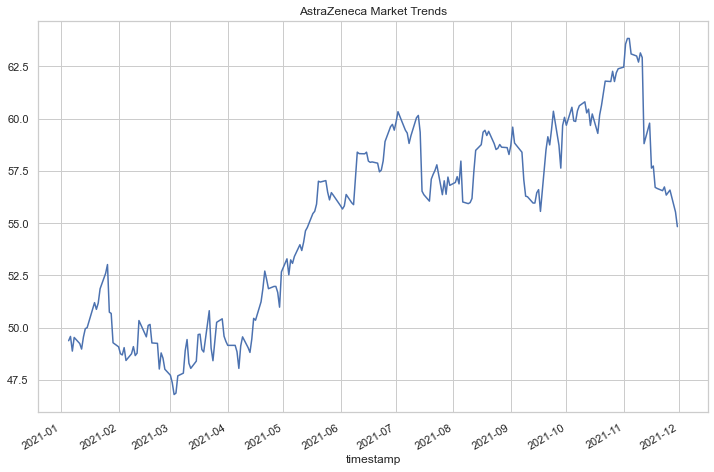

In [93]:
df_azn['adjusted_close'].plot(figsize=(12,8))
plt.title("AstraZeneca Market Trends")
plt.show() # plot the adjusted close data to look at the maket trends overtime 

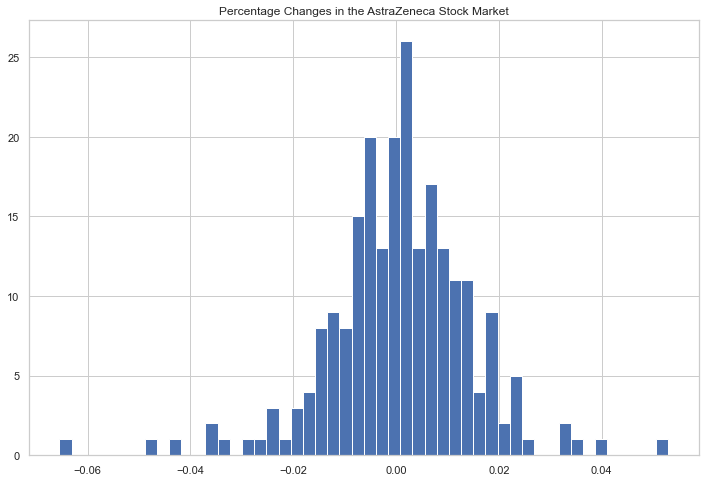

In [94]:
df_azn['change'].hist(bins=50, figsize=(12,8))
plt.title("Percentage Changes in the AstraZeneca Stock Market")
plt.show() #plot a hitsogram of the percentage changes to look at their distribution

In [95]:
df_azn['trend'] = 1 * (df_azn['change'] > 0) #crate a dummy for positive chhnage = 1 and negative change = 0
df_azn

,adjusted_close,change,trend
timestamp,,,
2021-01-05 00:00:00+00:00,49.375857,0.003563,1
2021-01-06 00:00:00+00:00,49.580372,0.004142,1
2021-01-07 00:00:00+00:00,48.879177,-0.014143,0
2021-01-08 00:00:00+00:00,49.531678,0.013349,1
2021-01-11 00:00:00+00:00,49.239513,-0.005899,0
...,...,...,...
2021-11-23 00:00:00+00:00,56.730000,0.003183,1
2021-11-24 00:00:00+00:00,56.340000,-0.006875,0
2021-11-26 00:00:00+00:00,56.580000,0.004260,1


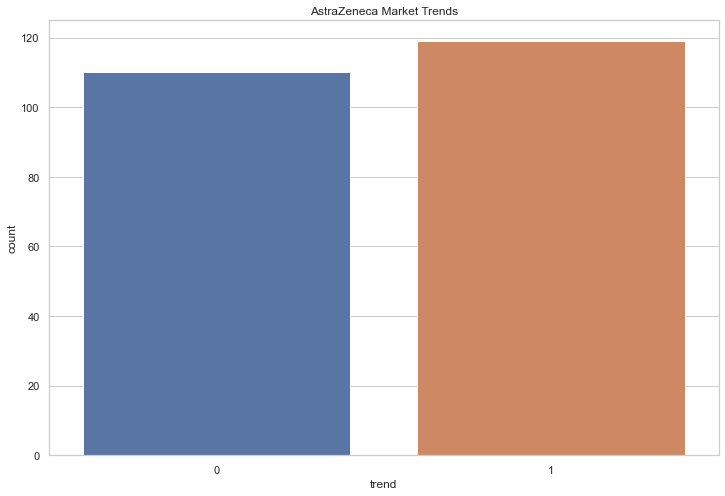

In [96]:
ax=plt.subplots(1,1,figsize=(12,8))
sns.countplot(x='trend',data=df_azn)# we show the frequency of positive and negative changes with bar plot 
plt.title("AstraZeneca Market Trends")
plt.show()

In [97]:
# we merge the finance, sentiment and occurrence analysis datasets
df = df_azn.merge(nyt, how='inner', left_index=True, right_index=True)
df_a = df.merge(g_df3, how='inner', left_index=True, right_index=True)

## Monthly

#### We use the loaded monthly data for the NYT sentiment analysis setting the date as index  and dropping the columns that are of no interest to us

In [98]:
nyt_m = nyt_data[['pub_date','polarity_abstract']]
nyt_m.set_index('pub_date', inplace = True)
nyt_m

,polarity_abstract
pub_date,
2021-11-01 12:26:03+00:00,0.300000
2021-11-01 14:14:46+00:00,0.000000
2021-11-01 15:06:46+00:00,0.087273
2021-11-01 16:29:36+00:00,-0.033333
2021-11-01 16:40:48+00:00,0.250000
...,...
2021-11-30 16:03:10+00:00,0.350000
2021-11-30 17:08:17+00:00,0.146591
2021-11-30 18:14:44+00:00,-0.008333


In [166]:
# We create a dummy for positive change = 1 and negative change = 0 in news sentiment

nyt_m['polarity_trend'] = 1 * (nyt_m['polarity_abstract'] > 0)


<ipython-input-166-9e13bf9e6bca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt_m['polarity_trend'] = 1 * (nyt_m['polarity_abstract'] > 0)


#### we show the frequency of positive and negative sentiment detected in the news with a bar plot

/Users/ruijin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


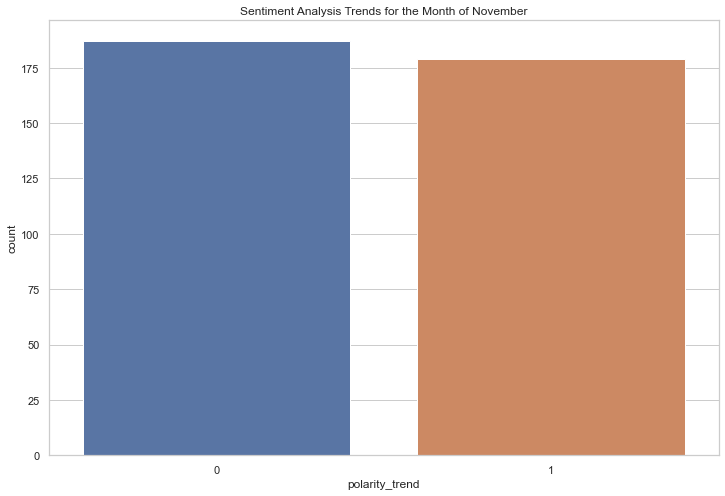

In [168]:
ax=plt.subplots(1,1,figsize=(12,8))
sns.countplot('polarity_trend',data=nyt_m)
plt.title("Sentiment Analysis Trends for the Month of November")
plt.show()

#### Using the Guardian occurence analysis dataset, we select data for the month of November setting the date as index

In [162]:
# Filter to get just the results for November, export to a CSV - this will later be used in regression 
# analysis to see how occurrence of covid-related words over November relate to stock market activity
date1 = datetime.date(2021, 11, 1)
date2 = datetime.date(2021, 11, 30)
g_df.sort_values(by = ['DateTimePublished'], inplace = True)
g_df = g_df[(g_df['DatePublished'] >= date1) & (g_df['DatePublished'] <= date2)]
g_df = g_df[['DateTimePublished','ContainsAz','ContainsPf','ContainsMd','ContainsVaccine','ContainsCv']].sort_values(['DateTimePublished'], axis=0)
g_df.set_index('DateTimePublished', inplace = True)
g_df 


KeyError: 'DatePublished'

In [150]:
g_df.head()

,ContainsAz,ContainsPf,ContainsMd,ContainsVaccine,ContainsCv
DateTimePublished,,,,,
2021-11-01 00:57:26+00:00,0,0,0,0,0
2021-11-01 01:45:50+00:00,0,0,0,0,0
2021-11-01 01:45:50+00:00,0,0,0,0,0
2021-11-01 02:49:32+00:00,0,0,0,0,0
2021-11-01 02:49:32+00:00,0,0,0,0,0


In [158]:
g_df["ContainsPf"].sum()

2

#### We load the monthly financial data for the three pharmaceutical companies, run some exploratory anlayses and merge the these with the sentiment and occurrence analyses datasets.

### Moderna

In [100]:
df_mrna = pd.read_csv('data/MRNA_monthly.csv', index_col=0, parse_dates=['time']) #read the Moderna data
df_mrna.sort_values("time", inplace = True)
df_mrna.head()

,close,change
time,,
2021-11-01 04:05:00,339.00,NaN
2021-11-01 04:20:00,339.99,0.002920
2021-11-01 04:30:00,339.96,-0.000088
2021-11-01 04:45:00,338.01,-0.005736
2021-11-01 05:10:00,341.00,0.008846


In [101]:
df_mrna.dropna(inplace = True)# drop rows where the vlaue is null

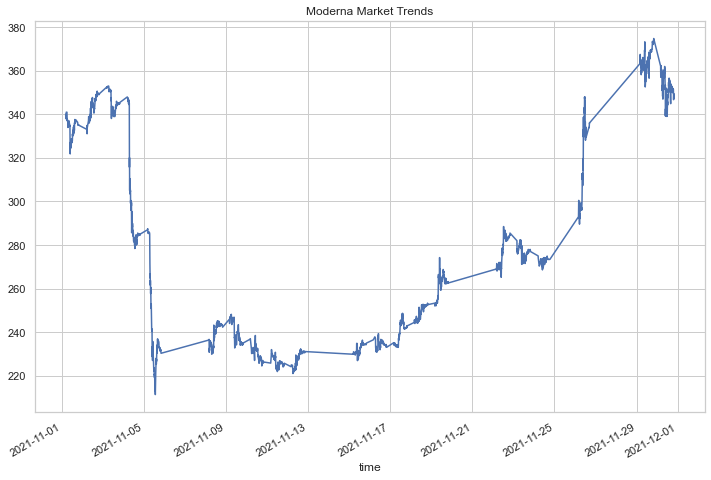

In [102]:
df_mrna['close'].plot(figsize=(12,8))
plt.title("Moderna Market Trends")
plt.show() # plot the adjusted close data to look at the maket trends overtime 

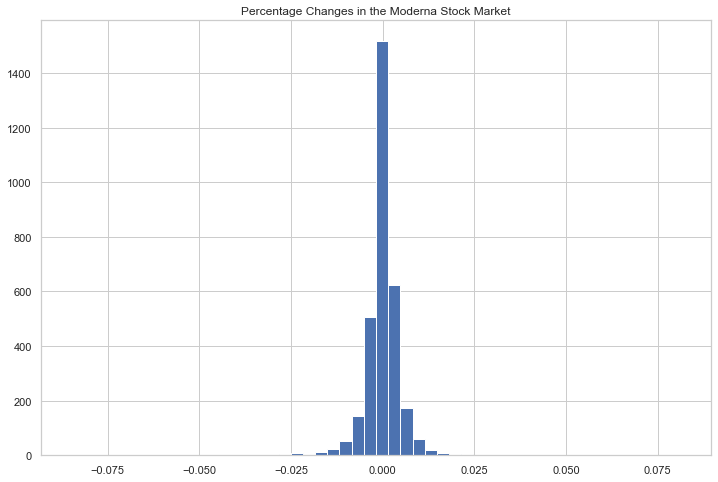

In [103]:
df_mrna['change'].hist(bins=50, figsize=(12,8))
plt.title("Percentage Changes in the Moderna Stock Market")
plt.show() #plot a hitsogram of the percentage changes to look at their distribution

In [104]:
df_mrna['trend'] = 1 * (df_mrna['change'] > 0) #crate a dummy for positive chhnage = 1 and negative change = 0
df_mrna

,close,change,trend
time,,,
2021-11-01 04:20:00,339.9900,2.920354e-03,1
2021-11-01 04:30:00,339.9600,-8.823789e-05,0
2021-11-01 04:45:00,338.0100,-5.735969e-03,0
2021-11-01 05:10:00,341.0000,8.845892e-03,1
2021-11-01 05:15:00,341.0000,0.000000e+00,0
...,...,...,...
2021-11-30 19:40:00,347.7600,1.151543e-03,1
2021-11-30 19:45:00,347.3701,-1.121176e-03,0
2021-11-30 19:50:00,347.3700,-2.878774e-07,0


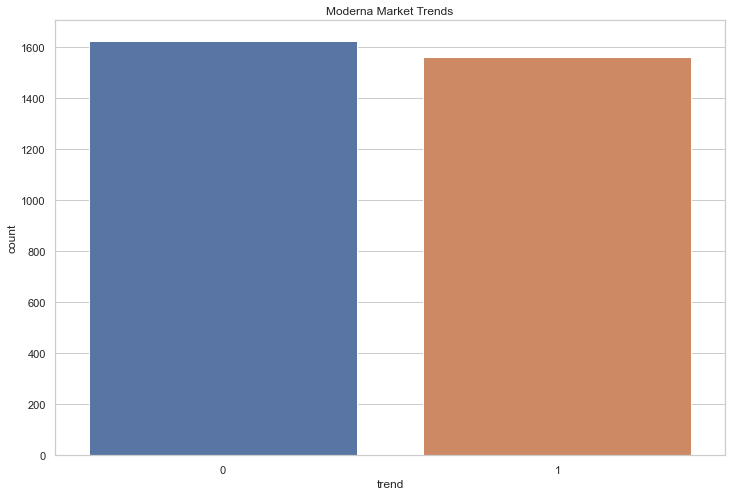

In [105]:
ax=plt.subplots(1,1,figsize=(12,8))
sns.countplot(x ='trend',data=df_mrna)# we show the frequency of positive and negative changes with bar plot 
plt.title("Moderna Market Trends")
plt.show()

In [144]:
# we merge the finance, sentiment and occurrence analysis datasets
# nyt_m.index = pd.to_datetime(nyt_m.index).tz_localize('Etc/UCT')
# g_df.index = pd.to_datetime(g_df.index).tz_localize('Etc/UCT')
df = pd.merge_asof(df_mrna, nyt_m, left_index=True, right_index=True)
dfm = pd.merge_asof(df, g_df, left_index=True, right_index=True)

In [141]:
dfm.dropna(inplace = True)# drop rows where the vlaue is null

### Pfizer

In [110]:
df_pfe = pd.read_csv('data/PFE_monthly.csv', index_col=0, parse_dates=['time']) #read the Moderna data
df_pfe.sort_values("time", inplace = True)
df_pfe.head()

,close,change
time,,
2021-11-01 04:05:00,62.72,NaN
2021-11-01 04:10:00,62.59,-0.002073
2021-11-01 04:30:00,62.49,-0.001598
2021-11-01 05:00:00,62.42,-0.001120
2021-11-01 07:15:00,62.32,-0.001602


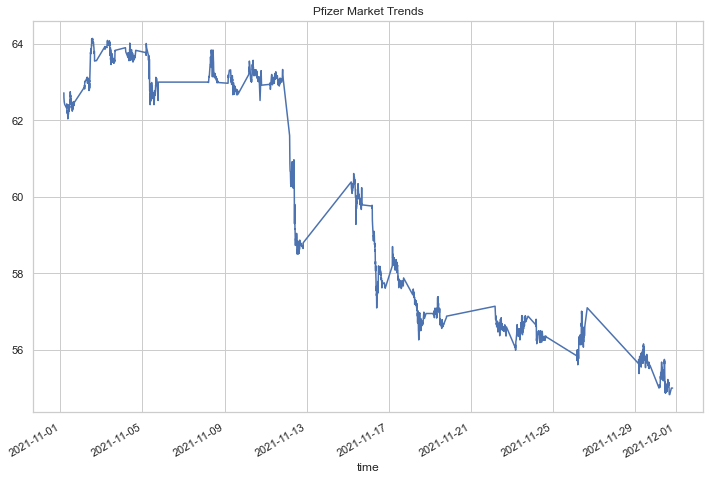

In [111]:
df_pfe['close'].plot(figsize=(12,8))
plt.title("Pfizer Market Trends")
plt.show() # plot the adjusted close data to look at the maket trends overtime 

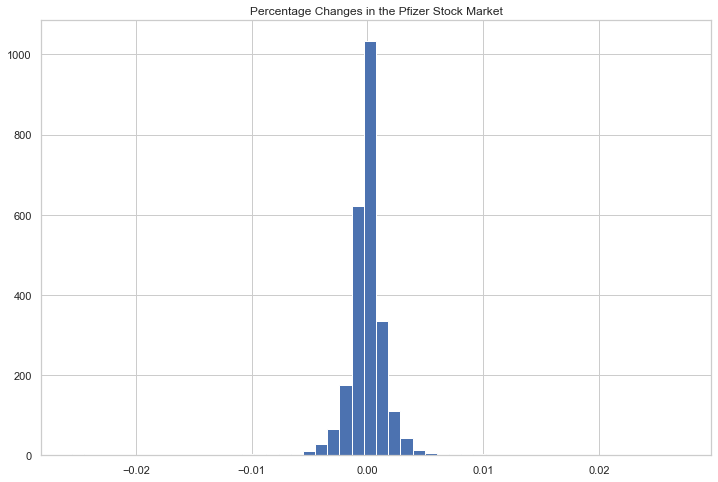

In [112]:
df_pfe['change'].hist(bins=50, figsize=(12,8))
plt.title("Percentage Changes in the Pfizer Stock Market")
plt.show() #plot a hitsogram of the percentage changes to look at their distribution

In [113]:
df_pfe['trend'] = 1 * (df_pfe['change'] > 0) #crate a dummy for positive chhnage = 1 and negative change = 0
df_pfe

,close,change,trend
time,,,
2021-11-01 04:05:00,62.7200,NaN,0
2021-11-01 04:10:00,62.5900,-0.002073,0
2021-11-01 04:30:00,62.4900,-0.001598,0
2021-11-01 05:00:00,62.4200,-0.001120,0
2021-11-01 07:15:00,62.3200,-0.001602,0
...,...,...,...
2021-11-30 16:35:00,54.8300,0.000000,0
2021-11-30 18:30:00,55.0000,0.003100,1
2021-11-30 18:55:00,55.0000,0.000000,0


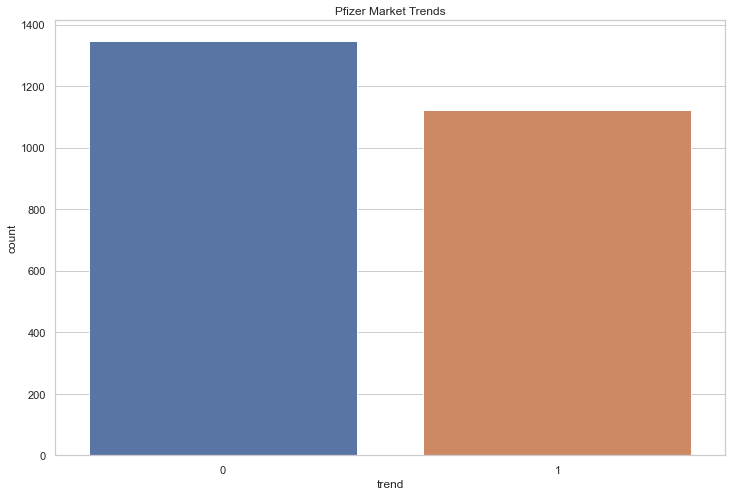

In [114]:
ax=plt.subplots(1,1,figsize=(12,8))
sns.countplot(x ='trend',data=df_pfe)# we show the frequency of positive and negative changes with bar plot 
plt.title("Pfizer Market Trends")
plt.show()

In [115]:
# we merge the finance, sentiment and occurrence analysis datasets
df = pd.merge_asof(df_pfe, nyt_m, left_index=True, right_index=True)
dfp = pd.merge_asof(df, g_df, left_index=True, right_index=True)

In [116]:
dfp.dropna(inplace = True)# drop rows where the vlaue is null

### AstraZeneca

In [117]:
df_azn = pd.read_csv('data/AZN_monthly.csv', index_col=0, parse_dates=['time']) #read the Moderna data
df_azn.sort_values("time", inplace = True)
df_azn.head()

,close,change
time,,
2021-11-01 04:05:00,62.72,NaN
2021-11-01 04:10:00,62.59,-0.002073
2021-11-01 04:30:00,62.49,-0.001598
2021-11-01 05:00:00,62.42,-0.001120
2021-11-01 07:15:00,62.32,-0.001602


In [118]:
df_azn.dropna(inplace = True)# drop rows where the vlaue is null

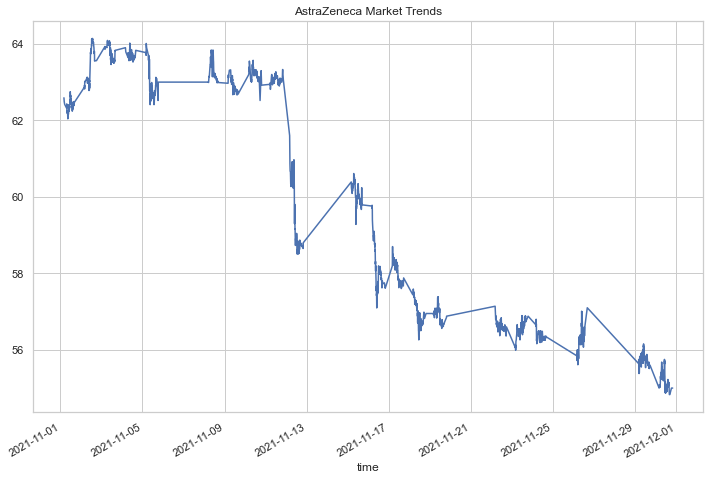

In [119]:
df_azn['close'].plot(figsize=(12,8))
plt.title("AstraZeneca Market Trends")
plt.show() # plot the adjusted close data to look at the maket trends overtime 

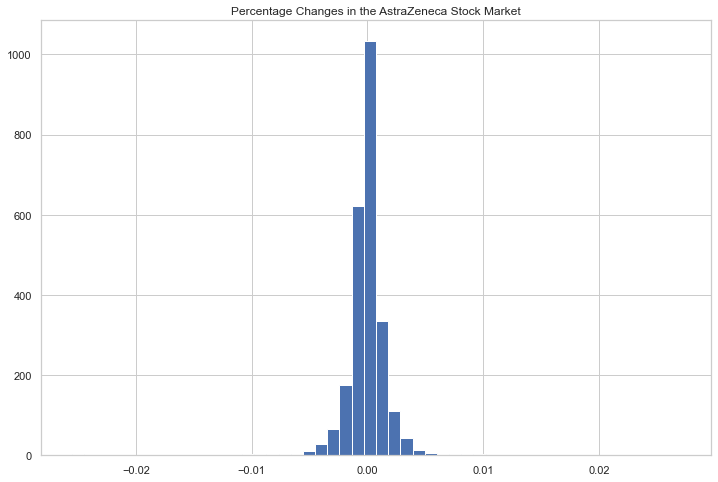

In [120]:
df_azn['change'].hist(bins=50, figsize=(12,8))
plt.title("Percentage Changes in the AstraZeneca Stock Market")
plt.show() #plot a hitsogram of the percentage changes to look at their distribution

In [121]:
df_azn['trend'] = 1 * (df_azn['change'] > 0) #crate a dummy for positive chhnage = 1 and negative change = 0
df_azn

,close,change,trend
time,,,
2021-11-01 04:10:00,62.5900,-0.002073,0
2021-11-01 04:30:00,62.4900,-0.001598,0
2021-11-01 05:00:00,62.4200,-0.001120,0
2021-11-01 07:15:00,62.3200,-0.001602,0
2021-11-01 07:30:00,62.4300,0.001765,1
...,...,...,...
2021-11-30 16:35:00,54.8300,0.000000,0
2021-11-30 18:30:00,55.0000,0.003100,1
2021-11-30 18:55:00,55.0000,0.000000,0


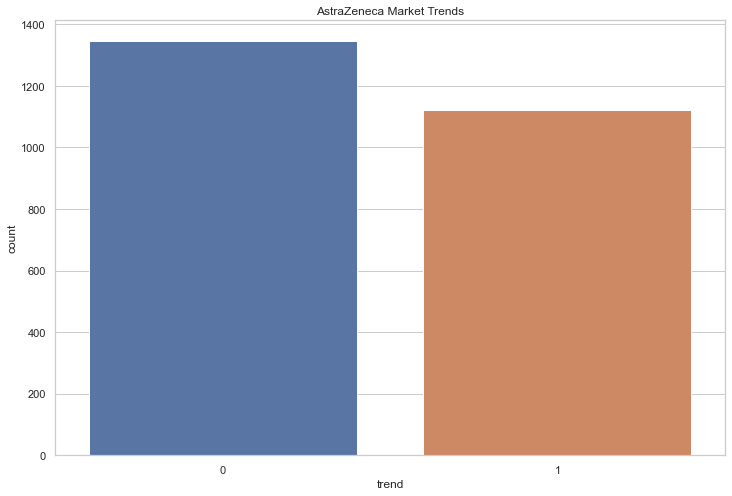

In [122]:
ax=plt.subplots(1,1,figsize=(12,8))
sns.countplot(x ='trend',data=df_azn)# we show the frequency of positive and negative changes with bar plot 
plt.title("AstraZeneca Market Trends")
plt.show()

In [123]:
# we merge the finance, sentiment and occurrence analysis datasets
df = pd.merge_asof(df_azn, nyt_m, left_index=True, right_index=True)
dfa = pd.merge_asof(df, g_df, left_index=True, right_index=True)

In [124]:
dfa.dropna(inplace = True)# drop rows where the vlaue is null

# Regression Analysis

### Explaining Market Price Change with News Sentiment

#### We use regression analysis to look at the relationship between the probability of witnessing an increase in stock market prices and the sentiment of Covid-related news. We run two analyses one for the year 2021 and one for November.



### Yearly Analysis

We use logistic regression to detect the potential influence of Covid-related news sentiment on the probability of witnessing positive trends in the market prices of Moderna, Pfizer, and AstraZeneca for the year 2021. We run a binomial logistic regression of the trend (positive = 1 or negative = 0) on the abstract polarity for each pharmaceutical company:

#### Moderna 

In [126]:
#we run the regression for Moderna and show the results
log_reg = sm.Logit(df_m['trend'], df_m['abstract_polarity']).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.692960
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                  229
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                            0
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:               -0.002061
Time:                        18:15:56   Log-Likelihood:                -158.69
converged:                       True   LL-Null:                       -158.36
Covariance Type:            nonrobust   LLR p-value:                       nan
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
abstract_polarity     0.0652      0.223      0.293      0.770      -0.371       0.502


#### AstraZeneca

In [127]:
#we run the regression for Astrazeneca and show the results
log_reg = sm.Logit(df_a['trend'], df_a['abstract_polarity']).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.689401
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                  229
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                            0
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:                0.004295
Time:                        18:16:00   Log-Likelihood:                -157.87
converged:                       True   LL-Null:                       -158.55
Covariance Type:            nonrobust   LLR p-value:                       nan
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
abstract_polarity     0.2924      0.224      1.306      0.191      -0.146       0.731


#### Pfizer

In [128]:
#we run the regression for Pfizer and show the results
log_reg = sm.Logit(df_p['trend'], df_p['abstract_polarity']).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.692792
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                  229
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                            0
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:               0.0001688
Time:                        18:16:02   Log-Likelihood:                -158.65
converged:                       True   LL-Null:                       -158.68
Covariance Type:            nonrobust   LLR p-value:                       nan
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
abstract_polarity     0.0899      0.223      0.403      0.687      -0.347       0.527


### Monthly Analysis

We then use the same technique to detect the potential influence of Covid-related news sentiment on the probability of witnessing positive trends in the market prices of Moderna, Pfizer, and AstraZeneca for the month of November. We run a binomial logistic regression of the trend (positive = 1 or negative = 0) on the abstract polarity for each pharmaceutical company:

#### Moderna 

In [142]:
#we run the regression for Moderna and show the results
log_reg = sm.Logit(dfm['trend'], dfm['polarity_abstract']).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.692800
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                 3106
Model:                          Logit   Df Residuals:                     3105
Method:                           MLE   Df Model:                            0
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:               0.0003136
Time:                        18:23:19   Log-Likelihood:                -2151.8
converged:                       True   LL-Null:                       -2152.5
Covariance Type:            nonrobust   LLR p-value:                       nan
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
polarity_abstract    -0.2882      0.196     -1.467      0.142      -0.673       0.097


#### AstraZeneca

In [130]:
#we run the regression for Astrazeneca and show the results
log_reg = sm.Logit(dfa['trend'], dfa['polarity_abstract']).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.692939
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                 2418
Model:                          Logit   Df Residuals:                     2417
Method:                           MLE   Df Model:                            0
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:               -0.005824
Time:                        18:16:10   Log-Likelihood:                -1675.5
converged:                       True   LL-Null:                       -1665.8
Covariance Type:            nonrobust   LLR p-value:                       nan
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
polarity_abstract     0.2179      0.217      1.004      0.316      -0.208       0.644


#### Pfizer

In [131]:
#we run the regression for Pfizer and show the results
log_reg = sm.Logit(dfp['trend'], dfp['polarity_abstract']).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.692939
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                 2418
Model:                          Logit   Df Residuals:                     2417
Method:                           MLE   Df Model:                            0
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:               -0.005824
Time:                        18:16:12   Log-Likelihood:                -1675.5
converged:                       True   LL-Null:                       -1665.8
Covariance Type:            nonrobust   LLR p-value:                       nan
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
polarity_abstract     0.2179      0.217      1.004      0.316      -0.208       0.644


## Explaining Market Price Change with News Occurrence

We use regression analysis to look at the relationship between the probability of witnessing an increase in stock market prices and the occurrence of Covid-related news. We run two analyses one for the year 2021 and one for the month of November.

### Yearly Analysis

We use logistic regression to detect the potential influence of Covid-related news occurrence on the probability of witnessing positive trends in the market prices of Moderna, Pfizer, and AstraZeneca for the year 2021. We run a binomial logistic regression of the trend (positive = 1 or negative = 0) on news occurrence for each pharmaceutical company:

#### Moderna

In [132]:
#we run the regression for Moderna and show the results
log_reg = sm.Logit(df_m['trend'], df_m[['ContainsCv','ContainsVaccine','ContainsMd']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.689811
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                  229
Model:                          Logit   Df Residuals:                      226
Method:                           MLE   Df Model:                            2
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:                0.002493
Time:                        18:16:16   Log-Likelihood:                -157.97
converged:                       True   LL-Null:                       -158.36
Covariance Type:            nonrobust   LLR p-value:                    0.6738
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ContainsCv          0.0014      0.012      0.120      0.905      -0.022       0.025
ContainsVaccin

#### AstraZeneca

In [133]:
#we run the regression for Astrazeneca and show the results
log_reg = sm.Logit(df_a['trend'], df_a[['ContainsCv', 'ContainsVaccine', 'ContainsAz']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.690031
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                  229
Model:                          Logit   Df Residuals:                      226
Method:                           MLE   Df Model:                            2
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:                0.003385
Time:                        18:16:20   Log-Likelihood:                -158.02
converged:                       True   LL-Null:                       -158.55
Covariance Type:            nonrobust   LLR p-value:                    0.5847
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ContainsCv         -0.0019      0.012     -0.156      0.876      -0.025       0.022
ContainsVaccin

#### Pfizer

In [134]:
#we run the regression for Pfizer and show the results
log_reg = sm.Logit(df_p['trend'], df_p[['ContainsVaccine', 'ContainsCv', 'ContainsPf']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.691636
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                  229
Model:                          Logit   Df Residuals:                      226
Method:                           MLE   Df Model:                            2
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:                0.001837
Time:                        18:16:23   Log-Likelihood:                -158.38
converged:                       True   LL-Null:                       -158.68
Covariance Type:            nonrobust   LLR p-value:                    0.7471
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ContainsVaccine     0.0281      0.041      0.691      0.490      -0.052       0.108
ContainsCv    

### Monthly Analysis
We use the same technique to detect the potential influence of Covid-related news occurrence on the probability of witnessing positive trends in the market prices of Moderna, Pfizer, and AstraZeneca for the month of November. We run a binomial logistic regression of the trend (positive = 1 or negative = 0) on news occurrence for each pharmaceutical company:

In [106]:
#we load the daily data for the three pharmaceuticla companies inclusive of the news occurrence for November.
#dfa = pd.read_csv("data/AZN_change_month_g.csv", index_col = 0)
#dfm = pd.read_csv("data/MRNA_change_month_g.csv", index_col = 0)
#dfp = pd.read_csv("data/PFE_change_month_g.csv", index_col = 0)

#### Moderna

In [145]:
#we run the regression for Moderna and show the results
log_reg = sm.Logit(dfm['trend'], dfm[['ContainsCv','ContainsVaccine','ContainsMd']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.692776
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                 3181
Model:                          Logit   Df Residuals:                     3178
Method:                           MLE   Df Model:                            2
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:               0.0002522
Time:                        18:47:10   Log-Likelihood:                -2203.7
converged:                       True   LL-Null:                       -2204.3
Covariance Type:            nonrobust   LLR p-value:                    0.5736
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ContainsCv         -0.0335      0.070     -0.479      0.632      -0.170       0.103
ContainsVaccin

#### Pfizer

In [161]:
#we run the regression for Pfizer and show the results
log_reg = sm.Logit(dfp['trend'], dfp[['ContainsCv','ContainsVaccine']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.691302
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                 2418
Model:                          Logit   Df Residuals:                     2416
Method:                           MLE   Df Model:                            1
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:               -0.003448
Time:                        19:06:20   Log-Likelihood:                -1671.6
converged:                       True   LL-Null:                       -1665.8
Covariance Type:            nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ContainsCv         -0.2114      0.082     -2.587      0.010      -0.372      -0.051
ContainsVaccin

#### NB : We cannot use 'ContainsPf' as an independent variable for our model, as it contains only one observation. 

#### AstraZeneca

In [137]:
#we run the regression for Astrazeneca and show the results
log_reg = sm.Logit(dfa['trend'], dfa[['ContainsCv','ContainsVaccine','ContainsAz']]).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.691298
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                 2418
Model:                          Logit   Df Residuals:                     2415
Method:                           MLE   Df Model:                            2
Date:                Mon, 20 Dec 2021   Pseudo R-squ.:               -0.003442
Time:                        18:16:38   Log-Likelihood:                -1671.6
converged:                       True   LL-Null:                       -1665.8
Covariance Type:            nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
ContainsCv         -0.2099      0.082     -2.548      0.011      -0.371      -0.048
ContainsVaccin